# Lending Club Case Study

## Assignment Brief

You work for a consumer finance company __'Lending Club'__ which specialises in lending various types of loans to urban customers. <br>
When a person applies for a loan, there are two types of decisions that could be taken by the company:

**1. Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

**Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)

**Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

**Charged-off:** Applicant has not paid the installment in due time for a long period of time, i.e. he/she has defaulted on the loan 

**2. Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

## Business Objective

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 
<br><br>
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 
<br><br>
If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss.

## DataSet Understanding
 <br>
 The given dataset contains the complete loan data for all loans issued through the time period 2007 to 2011.

In [5]:
import os
import chardet

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy import stats

# plotting and styles
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
plt.style.use('fivethirtyeight')

# suppress warnings
pd.options.mode.chained_assignment = None


In [ ]:
# List of file encoding formats 

for f in [files for files in os.listdir() if files.split('.')[-1] in ['csv','xlsx']]:
  print("file: {0} ------encoding: {1}".format(f,chardet.detect(open(f,'rb').read(10000000))['encoding'])) 

file: loan.csv ------encoding: utf-8


# Data Understanding

In [6]:
loan = pd.read_csv('loan.csv', encoding='utf-8', low_memory=False)

In [7]:
# Number of features and corresponding records
loan.shape

(39717, 111)


> There are total of 111 consumer and loan attributes

> There are 39717 records in the dataset



In [8]:
loan.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [9]:
# Data type of the columns/features
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [10]:
# Distribution of features data types
loan.dtypes.value_counts()

float64    74
object     24
int64      13
dtype: int64

In [11]:
# Feature Analysis
loan.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717,39717,39717.000000,39717,39717,37258,38642,39717,3.971700e+04,39717,39717,39717,39717,39717,26777,39717,39706,39717,39717,39717.000000,39717.000000,39717,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39667,39717.000000,39717,39717.000000,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,2,371,NaN,7,35,28820,11,5,NaN,3,55,3,1,39717,26527,14,19615,823,50,NaN,NaN,526,NaN,NaN,NaN,NaN,NaN,NaN,1089,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,US Army,10+ years,RENT,NaN,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,NaN,NaN,Nov-98,NaN,NaN,NaN,NaN,NaN,NaN,0%,NaN,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,29096,956,NaN,12020,2917,134,8879,18899,NaN,16921,2260,32950,39717,1,210,18641,2184,597,7099,NaN,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,977,NaN,39717,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,NaN,NaN,324.561922,NaN,NaN,NaN,NaN,NaN,6.896893e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.315130,0.146512,NaN,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,NaN,22.088828,NaN,51.227887,50.989768,12153.596544,11567.149118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,NaN,NaN,208.874874,NaN,NaN,NaN,NaN,NaN,6.379377e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.678594,0.491812,NaN,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,NaN,11.401709,NaN,375.172839,373.824457,9042.040766,8942.672613,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,NaN,NaN,15.690000,NaN,NaN,NaN,NaN,NaN,4.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,0.000000

In [12]:
# Calculating the percentage of Null values in each column

NullPercentage = round(100*(loan.isnull().sum()/len(loan.id)), 2)
NullPercentage.loc[NullPercentage > 0]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

# Data Cleaning

As a part of Initial Data cleaning we would be discarding the features which contains more than 90% of Null values as they won't be contributing to the analysis

In [13]:
# Selecting the columns which have more than 90% of null values
less_impacted_paramters = list(NullPercentage[NullPercentage >= 90].index)
len(less_impacted_paramters)

56

There are `56` columns with more than `50%` values as nulls.<br>
Dropping these columns as these would not help in the analysis

In [14]:
# Filtering the loan dataset by dropping less impacted features
loan = loan.drop(less_impacted_paramters, axis=1)
loan.shape

(39717, 55)


> There are total of 55 consumer and loan attributes after removing Null valued Features



## Features Selection and Engineering


In [15]:
# Features after removing the Null value columns
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

There are total of `55` customer and loan attributes, we will sort all the features into 3 categories:
1. Customer Personal Details
2. Loan Application Attributes
3. Customer Credit Behaviour

### Customer Personal Details

These Details are mostly related to customer employment and his personal details:

`id`, `member_id`, `emp_title`, `emp_length`, `home_ownership`, `annual_inc`, 
 `zip_code`, `addr_state`

In [16]:
customer_personal = ['id', 'member_id', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 
 'zip_code', 'addr_state']

# Customer Perosal Details Dataframe
loan[customer_personal].head(3)

,id,member_id,emp_title,emp_length,home_ownership,annual_inc,zip_code,addr_state
0,1077501,1296599,NaN,10+ years,RENT,24000.0,860xx,AZ
1,1077430,1314167,Ryder,< 1 year,RENT,30000.0,309xx,GA
2,1077175,1313524,NaN,10+ years,RENT,12252.0,606xx,IL


In [17]:
loan[customer_personal].describe(include='all')

,id,member_id,emp_title,emp_length,home_ownership,annual_inc,zip_code,addr_state
count,3.971700e+04,3.971700e+04,37258,38642,39717,3.971700e+04,39717,39717
unique,NaN,NaN,28820,11,5,NaN,823,50
top,NaN,NaN,US Army,10+ years,RENT,NaN,100xx,CA
freq,NaN,NaN,134,8879,18899,NaN,597,7099
mean,6.831319e+05,8.504636e+05,NaN,NaN,NaN,6.896893e+04,NaN,NaN
std,2.106941e+05,2.656783e+05,NaN,NaN,NaN,6.379377e+04,NaN,NaN
min,5.473400e+04,7.069900e+04,NaN,NaN,NaN,4.000000e+03,NaN,NaN
25%,5.162210e+05,6.667800e+05,NaN,NaN,NaN,4.040400e+04,NaN,NaN
50%,6.656650e+05,8.508120e+05,NaN,NaN,NaN,5.900000e+04,NaN,NaN
75%,8.377550e+05,1.047339e+06,NaN,NaN,NaN,8.230000e+04,NaN,NaN


`id` : Clearly every value in this column is unique which won't be usefull for further risk analysis.<br>

`member_id`:  Clearly every value in this column is unique which won't be usefull for further risk analysis.<br>

`emp_title`: There are nearly `28820` unique values among `37258` rows. This won't be usefull for further risk analysis.<br>

`emp_length`: There are unique `11` categories in this column which helps us in analysing credit risk.<br>

`home_ownership`: There are unique `5` categories in this column which helps us in analysing credit risk.<br>

`annual_inc` : Annual Income is a important feature for analysis. We can able to understand weather defaulters are mostly high income or low income customers.<br>

`zip_code` : Zipcode doesn't determine the credit risk as all kinds of people(defaulter, non defaulter) will be randomly distributed among population of certain area, And there are around `800` categories which we be difficult to analyse.<br>

`addr_state` : State doesn't determine the credit risk as all kinds of people(defaulter, non defaulter) will be randomly distributed among population of certain area. Still we can have this column for analysing the defaulters areas wise as only `50` columns are existing<br>

In [18]:
customer_personal_filtered = ['emp_length', 'home_ownership', 'annual_inc', 'addr_state']
loan[customer_personal_filtered].head(5)

,emp_length,home_ownership,annual_inc,addr_state
0,10+ years,RENT,24000.0,AZ
1,< 1 year,RENT,30000.0,GA
2,10+ years,RENT,12252.0,IL
3,10+ years,RENT,49200.0,CA
4,1 year,RENT,80000.0,OR


### Loan Application Details

These Details are customer filled and lending club filled attributes in a loan application form

`loan_amnt`, `funded_amnt`, `funded_amnt_inv`, `term`, `int_rate`, `installment`,  `grade`, `subgrade`, `verification_status`, `issue_d`, `loan_status`, `pymnt_plan`,  `url`, `desc`, `purpose`, `title`, `dti`, `policy_code`, `application_type`

In [19]:
loan_attributes = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 
 'grade', 'sub_grade', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 
 'url', 'desc', 'purpose', 'title', 'dti', 'policy_code', 'application_type']

# Loan Attributes Details Dataframe
loan[loan_attributes].head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,dti,policy_code,application_type
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,27.65,1,INDIVIDUAL
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,1.00,1,INDIVIDUAL
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,8.72,1,INDIVIDUAL


In [20]:
loan[loan_attributes].describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loan_amnt,39717,NaN,NaN,NaN,11219.4,7456.67,500,5500,10000,15000,35000
funded_amnt,39717,NaN,NaN,NaN,10947.7,7187.24,500,5400,9600,15000,35000
funded_amnt_inv,39717,NaN,NaN,NaN,10397.4,7128.45,0,5000,8975,14400,35000
term,39717,2,36 months,29096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,39717,371,10.99%,956,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment,39717,NaN,NaN,NaN,324.562,208.875,15.69,167.02,280.22,430.78,1305.19
grade,39717,7,B,12020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,39717,35,B3,2917,NaN,NaN,NaN,NaN,NaN,NaN,NaN
verification_status,39717,3,Not Verified,16921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
issue_d,39717,55,Dec-11,2260,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Differnce between Loan Amount and Funded Amount
(loan['loan_amnt'] - loan['funded_amnt']).value_counts()/len(loan)*100

0        95.344563
7500      0.030214
3625      0.027696
3800      0.025178
5000      0.025178
           ...    
11375     0.002518
12125     0.002518
10300     0.002518
10125     0.002518
11500     0.002518
Length: 514, dtype: float64

More than 95% of loan amount customer required for is accepted by lending club

---



In [22]:
# Differnce between Loan Amount and Investor Funded Amount not more than 500$
difference_range = (loan['loan_amnt'] - loan['funded_amnt_inv'])<500

# Percentage of allowed values
len(loan[difference_range])/len(loan)*100


82.8637611098522


More than 80% of loan amount customer required for is sanctioned by investor

---


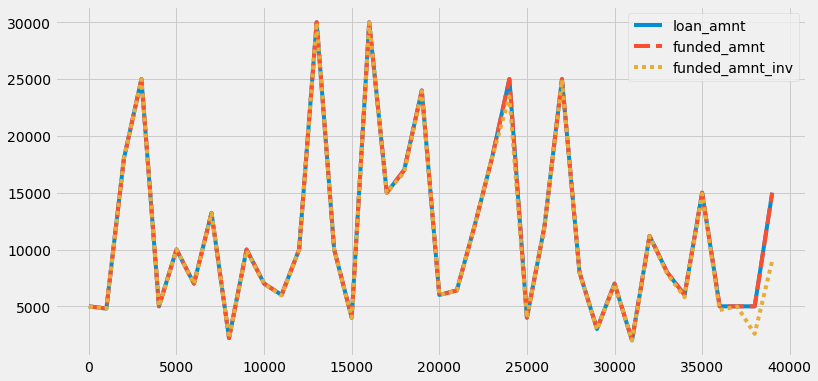

In [23]:
# Loan Amount/ Funded Amount/ Funded Amount Inv all have almost coincidental values

plt.figure(figsize=(12,6))
sns.lineplot(data=loan[::1000][['loan_amnt','funded_amnt','funded_amnt_inv']])


In [24]:
# Payment Plan

# There is only value in all rows 
loan['pymnt_plan'].value_counts()

n    39717
Name: pymnt_plan, dtype: int64

All  rows have same value `n`. This column can be dropped as its not useful for further analysis

---

In [25]:
# Purpose/Title

print(loan[['purpose','title']].head())
loan[['purpose','title']].describe()

          purpose                 title
0     credit_card              Computer
1             car                  bike
2  small_business  real estate business
3           other              personel
4           other              Personal


,purpose,title
count,39717,39706
unique,14,19615
top,debt_consolidation,Debt Consolidation
freq,18641,2184


Title is a raw field given by customer and lending club will categorize them into 14 categories as Purpose attribute

---

In [26]:
# Policy Code
loan['policy_code'].value_counts()

1    39717
Name: policy_code, dtype: int64

Policy Code attribute has same value in overall dataset and it can be dropped

---

In [27]:
# Application Type
loan['application_type'].value_counts()

INDIVIDUAL    39717
Name: application_type, dtype: int64

Application Type attribute has same value in overall dataset and it can be dropped

---

`loan_amnt`: Important parameter which estimates the credit risk for high amount<br>
`funded_amnt`: As we found more than `90%` of same values in loan_amnt and funded_amnt we can drop funded_amnt<br>
`funded_amnt_inv`: As we found more than `80%` of nearly same values in loan_amnt and funded_amnt_inv we can drop funded_amnt_inv<br>
`term`: It's an important parameter for analysis<br>
`int_rate`: It's an important parameter for analysis<br>
`installment`: It's an important parameter for analysis<br>
`grade`: Risk increases as interest and amount increases. Grades are categorical data for intrest and amount<br>
`subgrade`: Sub grades are categories in each grade and helpful for analysis<br>
`verification_status`: Need to do analysis to understand the importance of veryfying details of customer before sanctioning the loan<br>
`issue_d`: To analyse which month in an year customers are in requirement for loan and whether defaulters are using this time<br>
`loan_status`: Must Needed and it's a Target Feature<br>
`pymnt_plan`: Contains same value for all records so can dropped<br>
`url`: Not helpful for analysis<br>
`desc`: Not helpful for analysis as description is a vague value given by customer and each row has a unique value. <br>
`purpose`: Purpose is a category defined by lending club to categorize title given by customer<br>
`title`: Titles are Categorized into `14` different purposes. So title column can be ignored<br>
`dti`: Debt to Income is a critical paramter to analyse risk<br>
`policy_code`: Attribute has same value in all rows and can be dropped<br>
`application_type`: Attribute has same value in all rows and can be dropped<br>

In [28]:
# Selected attributes from loan attributes
loan_attributes_filtered = ['loan_amnt', 'term', 'int_rate', 'installment',  
                            'grade', 'sub_grade', 'verification_status', 'issue_d', 
                            'loan_status', 'purpose', 'dti']

loan[loan_attributes_filtered].head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,verification_status,issue_d,loan_status,purpose,dti
0,5000,36 months,10.65%,162.87,B,B2,Verified,Dec-11,Fully Paid,credit_card,27.65
1,2500,60 months,15.27%,59.83,C,C4,Source Verified,Dec-11,Charged Off,car,1.00
2,2400,36 months,15.96%,84.33,C,C5,Not Verified,Dec-11,Fully Paid,small_business,8.72


### Customer Credit Behaviour

These Details are customer behaviour on previous loans and his credit behaviour 

Most of the attributes doesn't contribute for risk assesment as for first time loan borrower these details won't be there to predict risk.

`delinq_2yrs` `earliest_cr_line`, `inq_last_6mths`, `mths_since_last_delinq`, 
 `open_acc`, `pub_rec`, `revol_bal`, `revol_util`,  `total_acc`, 
 `initial_list_status`, `out_prncp`, `out_prncp_inv`, `total_pymnt`, 
  `total_pymnt_inv`, `total_rec_prncp`, `total_rec_int`, `total_rec_late_fee`, 
 `recoveries`, `collection_recovery_fee`, `last_pymnt_d`, `last_pymnt_amnt`, 
 `last_credit_pull_d`, `collections_12_mths_ex_med`,`acc_now_delinq`, 
 `chargeoff_within_12_mths`, `delinq_amnt`,`pub_rec_bankruptcies`, `tax_liens`

In [29]:

customer_behaviour = ['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 
                      'open_acc', 'pub_rec', 'revol_bal', 'revol_util',  'total_acc', 
                      'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 
                      'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 
                      'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 
                      'last_credit_pull_d',  'collections_12_mths_ex_med','acc_now_delinq', 
                      'chargeoff_within_12_mths', 'delinq_amnt','pub_rec_bankruptcies', 'tax_liens']


# Customer Behavior Details Dataframe
loan[customer_behaviour].head()

,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,0,Jan-85,1,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,0,0.0,0,0.0,0.0
1,0,Apr-99,5,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0,0.0,0,0.0,0.0
2,0,Nov-01,2,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,0,0.0,0,0.0,0.0
3,0,Feb-96,1,35.0,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,0,0.0,0,0.0,0.0
4,0,Jan-96,0,38.0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,0,0.0,0,0.0,0.0


In [30]:
loan[customer_behaviour].describe(include='all')

,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,39717.000000,39717,39717.000000,14035.000000,39717.000000,39717.000000,39717.000000,39667,39717.000000,39717,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39646,39717.000000,39715,39661.0,39717.0,39661.0,39717.0,39020.000000,39678.0
unique,NaN,526,NaN,NaN,NaN,NaN,NaN,1089,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,NaN,106,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Nov-98,NaN,NaN,NaN,NaN,NaN,0%,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May-16,NaN,May-16,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,370,NaN,NaN,NaN,NaN,NaN,977,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1256,NaN,10308,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.146512,NaN,0.869200,35.900962,9.294408,0.055065,13382.528086,NaN,22.088828,NaN,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,NaN,2678.826162,NaN,0.0,0.0,0.0,0.0,0.043260,0.0
std,0.491812,NaN,1.070219,22.020060,4.400282,0.237200,15885.016641,NaN,11.401709,NaN,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,NaN,4447.136012,NaN,0.0,0.0,0.0,0.0,0.204324,0.0
min,0.000000,NaN,0.000000,0.000000,2.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.0,0.0,0.0,0.0,0.000000,0.0
25%,0.000000,NaN,0.000000,18.000000,6.000000,0.000000,3703.000000,NaN,13.000000,NaN,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,NaN,218.680000,NaN,0.0,0.0,0.0,0.0,0.000000,0.0
50%,0.000000,NaN,1.000000,34.000000,9.000000,0.000000,8850.000000,NaN,20.000000,NaN,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,NaN,546.140000,NaN,0.0,0.0,0.0,0.0,0.000000,0.0
75%,0.000000,NaN,1.000000,52.000000,12.000000,0.000000,17058.000000,NaN,29.000000,NaN,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,NaN,3293.160000,NaN,0.0,0.0,0.0,0.0,0.000000,0.0


In [31]:
# pub_rec_bankruptcies

# finding percentage of pub_rec_bankruptcies unique values
loan['pub_rec_bankruptcies'].value_counts()/len(loan)*100

0.0    94.012639
1.0     4.214820
2.0     0.017625
Name: pub_rec_bankruptcies, dtype: float64

In [32]:
# acc_now_delinq

# finding percentage of pub_rec_bankruptcies unique values
loan['acc_now_delinq'].value_counts()/len(loan)*100

0    100.0
Name: acc_now_delinq, dtype: float64

In [33]:
# initial_list_status

# finding percentage of initial_list_status unique values
loan['initial_list_status'].value_counts()/len(loan)*100

f    100.0
Name: initial_list_status, dtype: float64


`earliest_cr_line`: The First year the customer started his credit, it can be helpful<br> 
`inq_last_6mths`: Enquiring for loan with last six months<br> 
`open_acc`: Have around `44` unique values which can be clubbed to few and used for further analysis<br>
`revol_bal`: Revolving amount which has `21711` unique values will not help in analysis or visualization<br>
`revol_util`: This will be an useful parameter for furher analysis<br>
`total_acc`: There are around `82` unique values which can be clubbed to few and used for further analysis<br>
`initial_list_status`: All rows have same value so this column can be dropped<br>
`acc_now_delinq`: All rows have same value so this column can be dropped<br>
`pub_rec_bankruptcies`: There are only `3` categories out of which `94%` of values are same. So this feature won't help for analysis<br>
`delinq_2yrs` : There are `11` categories which will useful for analysis<br>
All the features below can be dropped as they are dependent on customer behaviour. For a first time loan applier these details doesn't exist:

`pub_rec`,`mths_since_last_delinq`, `out_prncp`, `out_prncp_inv`, `total_pymnt`, `total_pymnt_inv`, `total_rec_prncp`, `total_rec_int`, `total_rec_late_fee`, `recoveries`, `collection_recovery_fee`, `last_pymnt_d`, `last_pymnt_amnt`, `last_credit_pull_d`,`collections_12_mths_ex_med`, `chargeoff_within_12_mths`, `delinq_amnt`, `tax_liens`

In [34]:
customer_behaviour_filtered = ['earliest_cr_line', 'inq_last_6mths', 'open_acc',
                               'revol_util', 'total_acc', 'delinq_2yrs']

loan[customer_behaviour_filtered].head()            

,earliest_cr_line,inq_last_6mths,open_acc,revol_util,total_acc,delinq_2yrs
0,Jan-85,1,3,83.70%,9,0
1,Apr-99,5,3,9.40%,4,0
2,Nov-01,2,2,98.50%,10,0
3,Feb-96,1,10,21%,37,0
4,Jan-96,0,15,53.90%,38,0


In [35]:
loan_clean = loan[customer_behaviour_filtered +
                  customer_personal_filtered + 
                  loan_attributes_filtered]

loan_clean.head()

,earliest_cr_line,inq_last_6mths,open_acc,revol_util,total_acc,delinq_2yrs,emp_length,home_ownership,annual_inc,addr_state,loan_amnt,term,int_rate,installment,grade,sub_grade,verification_status,issue_d,loan_status,purpose,dti
0,Jan-85,1,3,83.70%,9,0,10+ years,RENT,24000.0,AZ,5000,36 months,10.65%,162.87,B,B2,Verified,Dec-11,Fully Paid,credit_card,27.65
1,Apr-99,5,3,9.40%,4,0,< 1 year,RENT,30000.0,GA,2500,60 months,15.27%,59.83,C,C4,Source Verified,Dec-11,Charged Off,car,1.00
2,Nov-01,2,2,98.50%,10,0,10+ years,RENT,12252.0,IL,2400,36 months,15.96%,84.33,C,C5,Not Verified,Dec-11,Fully Paid,small_business,8.72
3,Feb-96,1,10,21%,37,0,10+ years,RENT,49200.0,CA,10000,36 months,13.49%,339.31,C,C1,Source Verified,Dec-11,Fully Paid,other,20.00
4,Jan-96,0,15,53.90%,38,0,1 year,RENT,80000.0,OR,3000,60 months,12.69%,67.79,B,B5,Source Verified,Dec-11,Current,other,17.94


In [36]:
loan_clean.shape

(39717, 21)

In [37]:
loan_clean.columns

Index(['earliest_cr_line', 'inq_last_6mths', 'open_acc', 'revol_util',
       'total_acc', 'delinq_2yrs', 'emp_length', 'home_ownership',
       'annual_inc', 'addr_state', 'loan_amnt', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti'],
      dtype='object')

## Treating Null Values in rows

In [38]:
# Percentage of Null values in a row

missing = round(100*(loan_clean.isnull().sum()/len(loan_clean.index)), 2)
missing[missing != 0]

revol_util    0.13
emp_length    2.71
dtype: float64

In [39]:
# Revol Util and Emp Length Null values are removed

loan_clean  =  loan_clean[~loan_clean['revol_util'].isnull()]
loan_clean  =  loan_clean[~loan_clean['emp_length'].isnull()]

Applicant with status as `Current` is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.<br>
Since the analysis is to identify these risky loan applicants, the rows with this status will not be helpful for analysis

In [40]:
# Considering only Fully Paid and Charged Off Loan Status
loan_clean = loan_clean[(loan_clean['loan_status']=='Charged Off') | (loan_clean['loan_status']=='Fully Paid')]

# Categorical Loan Status encoding into numerical values
encode_status = {"loan_status" : {"Fully Paid":0, "Charged Off":1}}
loan_clean.replace(encode_status, inplace=True)

# Data Analysis



Functions to plot repetative plots throughout the analysis are defined below

In [41]:
# horizantal bar, line plot
def horizantal_bl(p1, p2):
  plt.subplot(1, 2, 1)
  plot = sns.barplot(data=p1['data'], x=p1['x'], y=p1['y'], order=p1['order'], ci=0)
  plot.set_title(p1['title'])
  plot.set_xlabel(p1['xl'])
  plot.set_ylabel(p1['yl'])
  try:
    if p1['r']:
      plot.set_xticklabels(labels=plot.get_xticklabels(), rotation=90)
      label=plot.get_xticklabels()
  except:
    pass

  plt.subplot(1, 2, 2)
  plot = sns.lineplot(data=p2['data'], x=p2['x'], y=p2['y'], hue_order=p2['order'])
  plot.set_title(p2['title'])
  plot.set_xlabel(p2['xl'])
  plot.set_ylabel(p2['yl'])
  try:
    if p2['r']:
      plot.set_xticklabels(labels=label, rotation=90)
  except:
    pass


def count_plot(data=None, x=None, y=None, hue=None, order=None, title=None, 
               xl=None, yl=None, legend=None, r=False):
  plot = sns.countplot(data = data, x = x, hue=hue, order=order)
  plot.set_title(title)
  plot.set_xlabel(xl)
  plot.set_ylabel(yl)
  plot.legend(legend)
  if r:
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


def pie_plot(title=None, legend=None, data=None):
  plt.pie(data, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.1)
  plt.legend(legend)
  circle = plt.Circle((0,0), 0.7, color='white')
  p = plt.gcf()
  p.gca().add_artist(circle)
  plt.axis('equal')
  plt.tight_layout()
  plt.title(title, y=2)
  

## Loan Status

`loan_status`: Current status of the loan

Loan Status is the target attribute for attributes

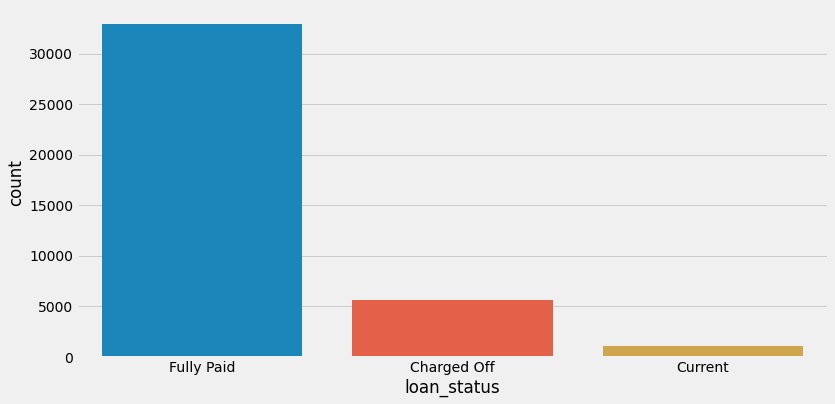

In [42]:
# Distribution of Loan Status

plt.figure(figsize=(12,6))
sns.countplot(x=loan['loan_status'])

## Employee Length

`emp_length`- Employment length in years. 

Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [43]:
# Different Categories in Employee Length attribute

loan_clean['emp_length'].value_counts()

10+ years    8487
< 1 year     4496
2 years      4286
3 years      4008
4 years      3335
5 years      3190
1 year       3163
6 years      2165
7 years      1708
8 years      1433
9 years      1226
Name: emp_length, dtype: int64

In [44]:
# Encoding employee length categories to a value

emp_length_ref = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

loan_clean = loan_clean.replace({"emp_length": emp_length_ref })

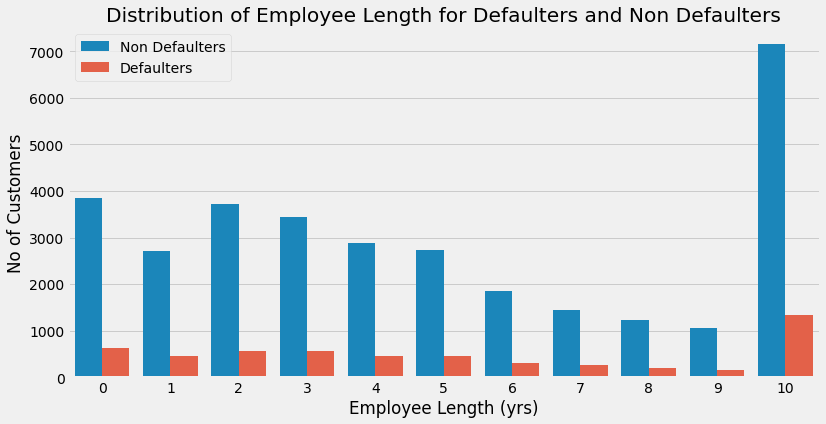

In [45]:
# Distribution of Emp Length 

plt.figure(figsize=(12,6))
count_plot(loan_clean, x='emp_length', hue='loan_status', order=sorted(loan_clean.emp_length.unique()), 
           title='Distribution of Employee Length for Defaulters and Non Defaulters',
           xl = 'Employee Length (yrs)', yl = 'No of Customers',
           legend = ['Non Defaulters', 'Defaulters'])

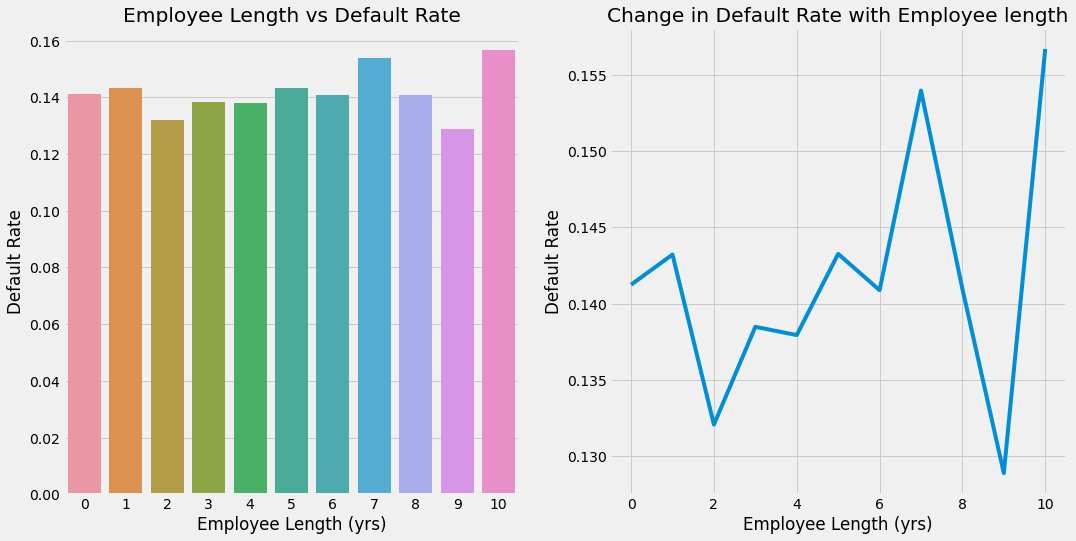

In [46]:
# Bar Plot for defaulter vs employee length
# Line Plot to determine rate of change in defaulter rate with increase in employee length 

line_plot = loan_clean.groupby('emp_length')['loan_status'].mean().to_frame().reset_index()

plt.figure(figsize=(16,8))
horizantal_bl(
    p1 =  {'data':loan_clean, 'x':'emp_length', 'y':'loan_status', 'hue':None, 
           'order':None, 'title':'Employee Length vs Default Rate', 
           'xl':'Employee Length (yrs)', 'yl':'Default Rate', 'legend':None},
    p2 =  {'data':line_plot, 'x':'emp_length', 'y':'loan_status', 'hue':None, 
           'order':None, 'title':'Change in Default Rate with Employee length', 
           'xl':'Employee Length (yrs)', 'yl':'Default Rate', 'legend':None}
)


> Insights

1. In the dataset, more number of loan borowerrs are the employees with more than 10 years of employement length
2. The emp_length seems to have the same behaviour with respect to 'Fully Paid' borrowers (Non Defaulters) and 'Charged Off' borrowers (Defaulters).
3. The Defaulter Rate is not linearlly related to employee length
<br>The Employement length column is not more likely to have an impact on the analysis.

## Home Ownership

`home_ownership` : The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.


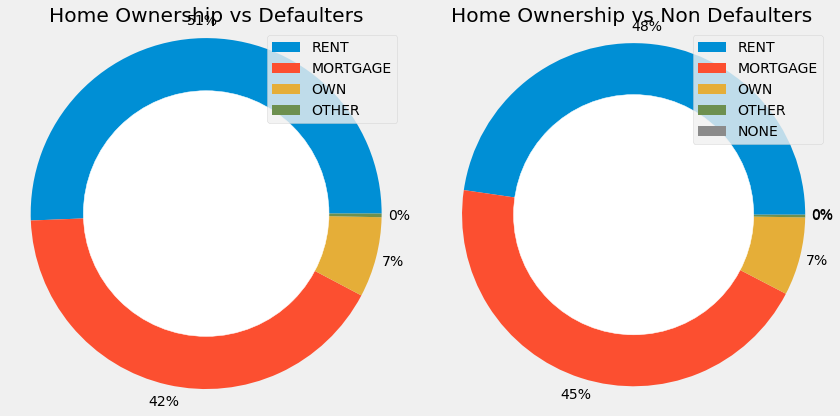

In [48]:
# The slices will be ordered and plotted counter-clockwise.

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
defaulter = loan_clean[loan_clean['loan_status']==1]
labels = (defaulter['home_ownership'].value_counts()).index
pie_plot(title='Home Ownership vs Defaulters', legend=labels, 
          data=list(defaulter['home_ownership'].value_counts()))

plt.subplot(1,2,2)
defaulter = loan_clean[loan_clean['loan_status']==0]
labels = (defaulter['home_ownership'].value_counts()).index
pie_plot(title='Home Ownership vs Non Defaulters', legend=labels, 
          data=list(defaulter['home_ownership'].value_counts()))



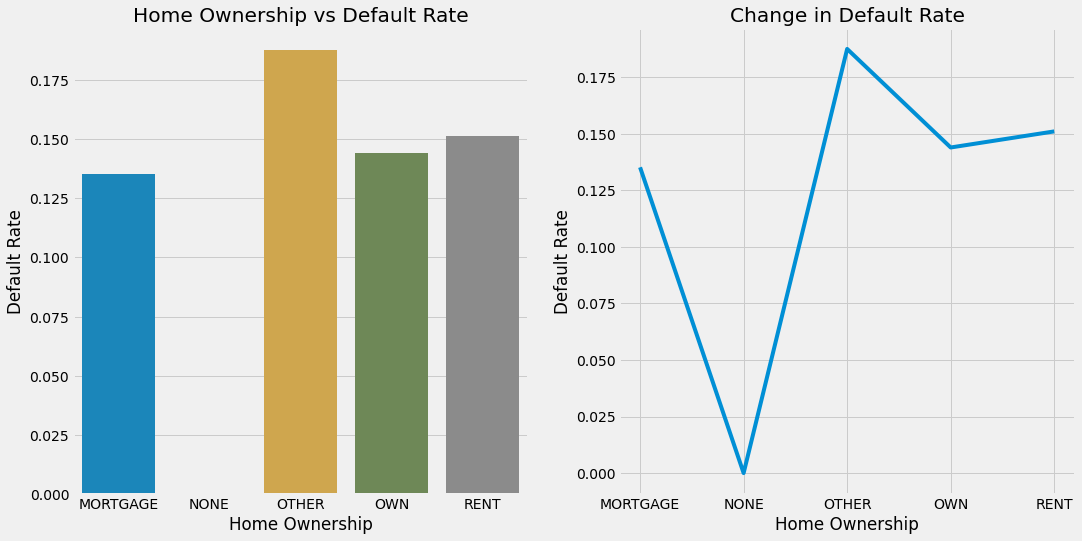

In [49]:
line_plot = loan_clean.groupby('home_ownership')['loan_status'].mean().to_frame().reset_index()

plt.figure(figsize=(16,8))
horizantal_bl(
    p1 =  {'data':loan_clean, 'x':'home_ownership', 'y':'loan_status', 'hue':None, 
           'order':['MORTGAGE','NONE','OTHER','OWN','RENT'], 'title':'Home Ownership vs Default Rate', 
           'xl':'Home Ownership', 'yl':'Default Rate', 'legend':None},
    p2 =  {'data':line_plot, 'x':'home_ownership', 'y':'loan_status', 'hue':None, 
           'order':None, 'title':'Change in Default Rate', 
           'xl':'Home Ownership', 'yl':'Default Rate', 'legend':None}
)

> Insights


1. home ownership distribution for both defaulter and non defaulter is almost similar
2. Generally home ownership as other has more default rate but no specific pattern among other groups

## Annual Income

`annual_inc`: The self-reported annual income provided by the borrower during registration.

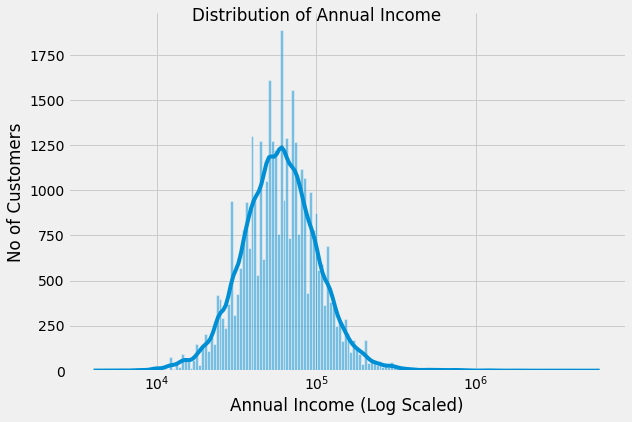

In [50]:
# Annual_inc

annual_inc = loan_clean[['annual_inc', 'loan_status']]

# Distribution of Annual Income of customers on log scale
annual_plot = sns.displot(annual_inc, x="annual_inc", log_scale=True, 
                          kind='hist', kde=True, height=6, aspect=1.5)
annual_plot.set_axis_labels("Annual Income (Log Scaled)", "No of Customers")
annual_plot.fig.suptitle('Distribution of Annual Income')
annual_plot

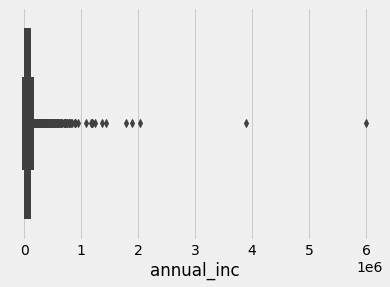

In [51]:
# Most of the Income distribution is around 10000
# Outliners are very high in this distribution

sns.boxplot(x=annual_inc['annual_inc'])

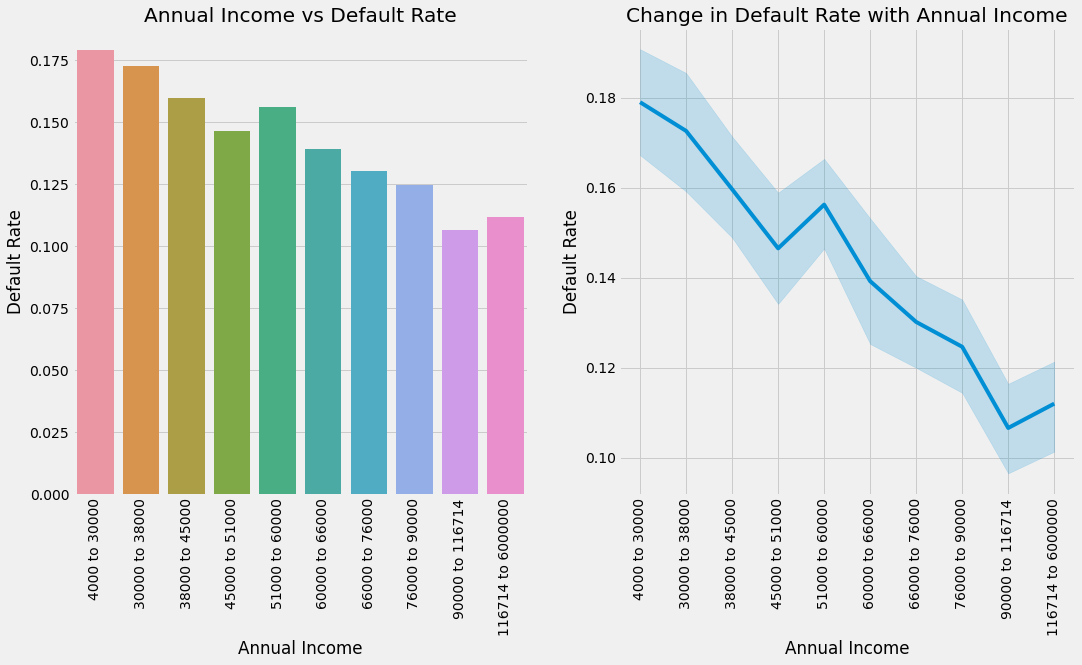

In [52]:
# Binning Annual Income into 10 groups with respective to quartile
# Binning based on quantile because incomes are not evenly distributed


ai = annual_inc['annual_inc']
defaulters_income = pd.qcut(annual_inc['annual_inc'], 10, 
                            labels=[str(int(ai.quantile(a/10)))+' to '+str(int(ai.quantile((1+a)/10))) for a in range(0,10)]).to_frame()
defaulters_income['loan_status'] = annual_inc['loan_status']                 
labels=[str(int(ai.quantile(a/10)))+' to '+str(int(ai.quantile((1+a)/10))) for a in range(0,10)]

plt.figure(figsize=(16,8))
horizantal_bl(
    p1 =  {'data':defaulters_income, 'x':'annual_inc', 'y':'loan_status', 'hue':None, 
           'order':None, 'title':'Annual Income vs Default Rate', 'r':True,
           'xl':'Annual Income', 'yl':'Default Rate', 'legend':None},
    p2 =  {'data':defaulters_income, 'x':'annual_inc', 'y':'loan_status', 'hue':None, 
           'order':None, 'title':'Change in Default Rate with Annual Income', 'r':True,
           'xl':'Annual Income', 'yl':'Default Rate', 'legend':None, 'label':labels}
)

In [114]:
# Slope of Defaut rate line plot
df = defaulters_income.groupby('annual_inc')['loan_status'].mean().to_frame().reset_index().reset_index()
s,i,r,p,se = stats.linregress(df['index'], df['loan_status'])
s

-0.007917084098658728

> Insights

1. As Income increases Defaulter rate is decreasing and its a potential attribute to analyse risk

## Addr State

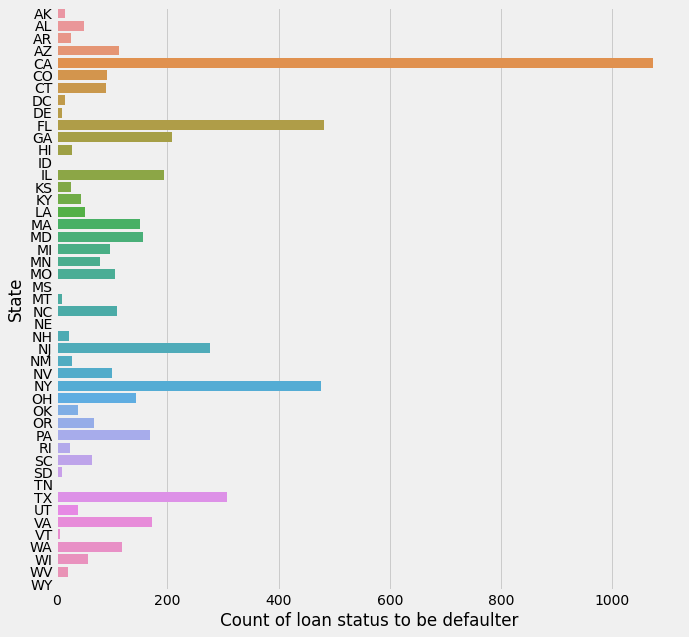

In [86]:
g = loan_clean[loan_clean['loan_status']==1].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

> Insights

The people in CA state have more number of defaulters

## Loan Amount

`loan_amnt`: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

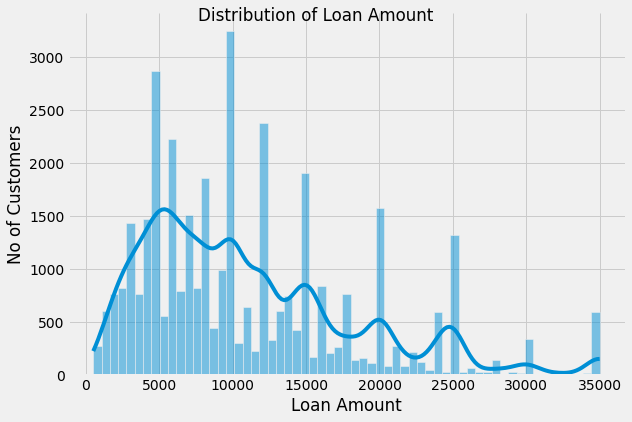

In [53]:
# Loan Amount

loan_amnt = loan_clean[['loan_amnt', 'loan_status']]

# Distribution of Loan Amount of customers
loan_plot = sns.displot(loan_amnt, x="loan_amnt", kind='hist', 
                        kde=True, height=6, aspect=1.5)
loan_plot.set_axis_labels("Loan Amount", "No of Customers")
loan_plot.fig.suptitle('Distribution of Loan Amount')
loan_plot

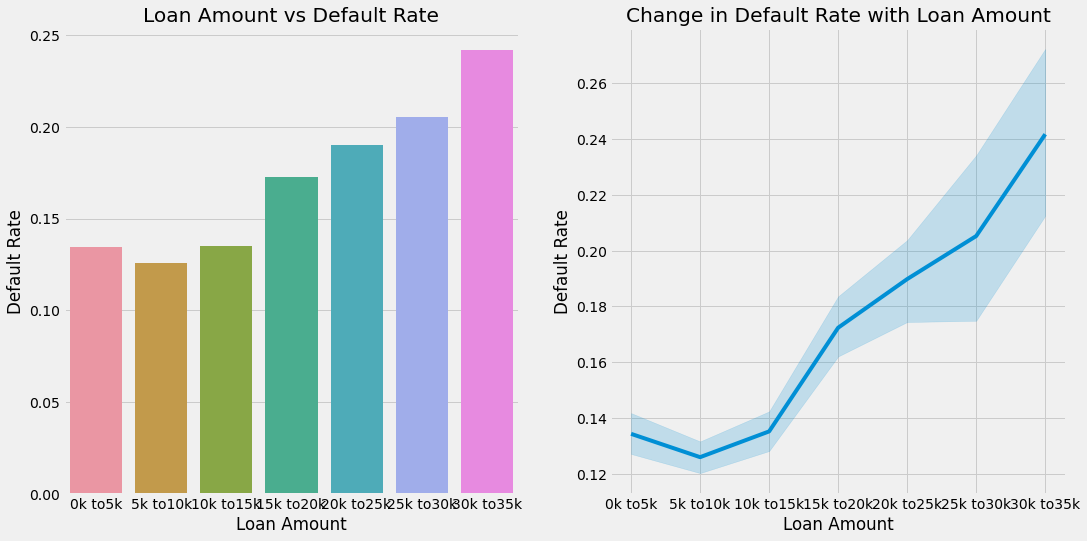

In [117]:
loan_amnt_bin = pd.cut(loan_clean['loan_amnt'], [x for x in range(0, 40000, 5000)], 
                       labels=[str(x)+'k to'+str(x+5)+'k' for x in range (0, 35, 5)]).to_frame()
loan_amnt_bin['loan_status'] = loan_clean['loan_status']

plt.figure(figsize=(16,8))
horizantal_bl(
    p1 =  {'data':loan_amnt_bin, 'x':'loan_amnt', 'y':'loan_status', 'hue':None, 
           'order':None, 'title':'Loan Amount vs Default Rate', 
           'xl':'Loan Amount', 'yl':'Default Rate', 'legend':None},
    p2 =  {'data':loan_amnt_bin, 'x':'loan_amnt', 'y':'loan_status', 'hue':None, 
           'order':None, 'title':'Change in Default Rate with Loan Amount', 
           'xl':'Loan Amount', 'yl':'Default Rate', 'legend':None}
)

In [118]:
# Slope of Defaut rate line plot
df = loan_amnt_bin.groupby('loan_amnt')['loan_status'].mean().to_frame().reset_index().reset_index()
s,i,r,p,se = stats.linregress(df['index'], df['loan_status'])
s

0.01910659056540027

> Insights

1. Most of the Loan Amount is with 15000 Range
2. Loan Amount for rounded Amount like (5000, 10,000, 15,000) we can see spikes in distribution
3. As Loan Amount Increases Default rate is increasing and its a critical attribute for analysing risk

## Term

`term`: The number of payments on the loan. Values are in months and can be either 36 or 60.

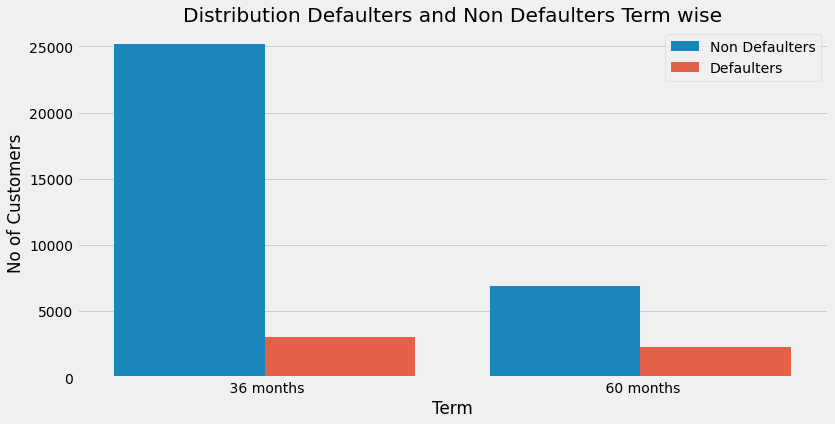

In [55]:
plt.figure(figsize=(12,6))
count_plot(loan_clean, x='term', hue='loan_status', 
           title='Distribution Defaulters and Non Defaulters Term wise',
           xl = 'Term', yl = 'No of Customers',
           legend = ['Non Defaulters', 'Defaulters'])

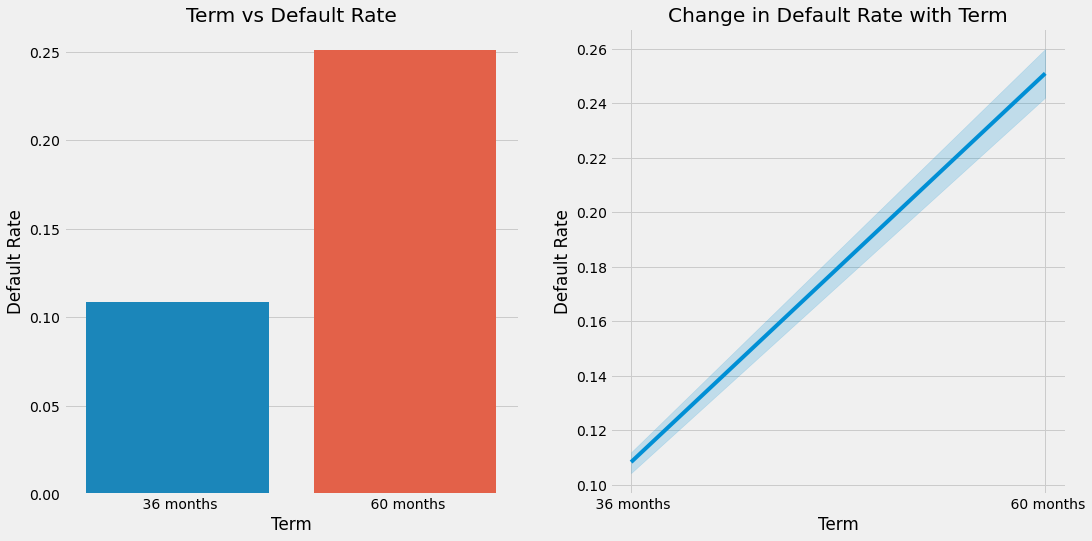

In [119]:
line_plot = loan_clean.groupby('term')['loan_status'].mean().to_frame().reset_index()

plt.figure(figsize=(16,8))
horizantal_bl(
    p1 =  {'data':loan_clean, 'x':'term', 'y':'loan_status', 'hue':None, 
           'order':None, 'title':'Term vs Default Rate', 
           'xl':'Term', 'yl':'Default Rate', 'legend':None},
    p2 =  {'data':loan_clean, 'x':'term', 'y':'loan_status', 'hue':None, 
           'order':None, 'title':'Change in Default Rate with Term', 
           'xl':'Term', 'yl':'Default Rate', 'legend':None}
)

In [120]:
# Slope of Defaut rate line plot
df = loan_clean.groupby('term')['loan_status'].mean().to_frame().reset_index().reset_index()
s,i,r,p,se = stats.linregress(df['index'], df['loan_status'])
s

0.14264574536949742

 Insights

1. As Term Increases Defaulter rate is increasing and its a critical attribute for analysing risk
2. More the term more the defaulters 

## Grade

`grade`: LC assigned loan grade

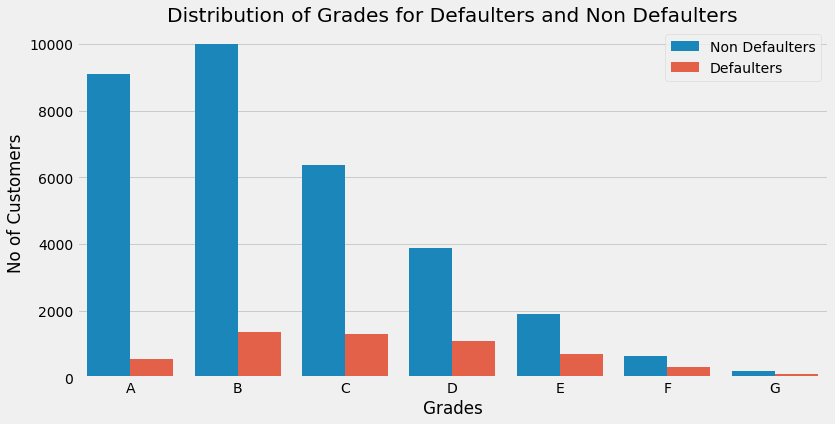

In [57]:
# Distribution of Grade

plt.figure(figsize=(12,6))
count_plot(loan_clean, x='grade', hue='loan_status', order = ['A','B','C','D','E','F','G'],
           title='Distribution of Grades for Defaulters and Non Defaulters',
           xl = 'Grades', yl = 'No of Customers',
           legend = ['Non Defaulters', 'Defaulters'])


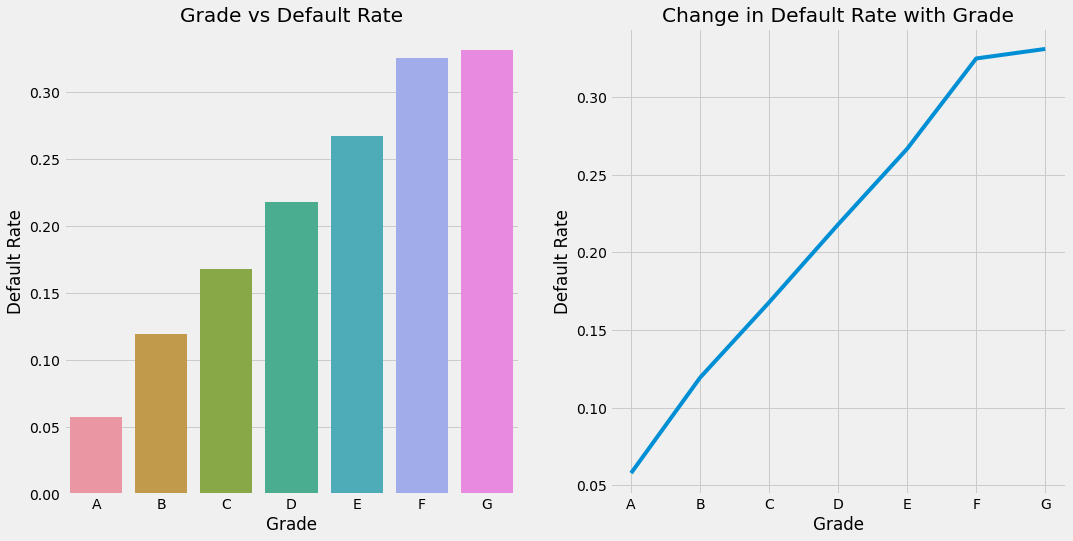

In [121]:
line_plot = loan_clean.groupby('grade')['loan_status'].mean().to_frame().reset_index()

plt.figure(figsize=(16,8))
horizantal_bl(
    p1 =  {'data':loan_clean, 'x':'grade', 'y':'loan_status', 'hue':None, 
           'order':['A','B','C','D','E','F','G'], 'title':'Grade vs Default Rate', 
           'xl':'Grade', 'yl':'Default Rate', 'legend':None},
    p2 =  {'data':line_plot, 'x':'grade', 'y':'loan_status', 'hue':None, 
           'order':['A','B','C','D','E','F','G'], 'title':'Change in Default Rate with Grade', 
           'xl':'Grade', 'yl':'Default Rate', 'legend':None}
)

In [123]:
# Slope of Defaut rate line plot
df = loan_clean.groupby('grade')['loan_status'].mean().to_frame().reset_index().reset_index()
s,i,r,p,se = stats.linregress(df['index'], df['loan_status'])
s

0.047507026178751896

 Insights

1. As Grade Increases Defaulter rate is increasing and its a critical attribute for analysing risk
2. Higer the Grade more the defaulters 

## Sub Grade

`sub_grade`: LC assigned loan subgrade

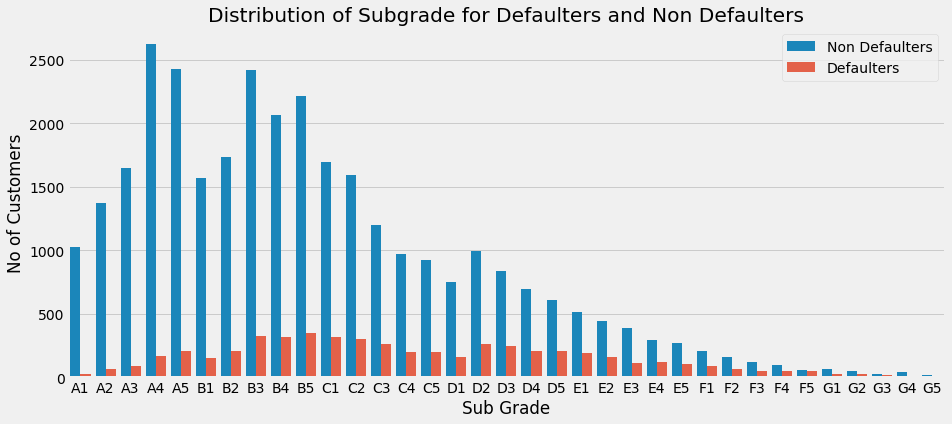

In [59]:
# Distribution of SubGrade

order = list(loan_clean['sub_grade'].value_counts().to_frame().index.sort_values())
plt.figure(figsize=(14,6))
count_plot(loan_clean, x='sub_grade', hue='loan_status', order = order,
           title='Distribution of Subgrade for Defaulters and Non Defaulters',
           xl = 'Sub Grade', yl = 'No of Customers',
           legend = ['Non Defaulters', 'Defaulters'])


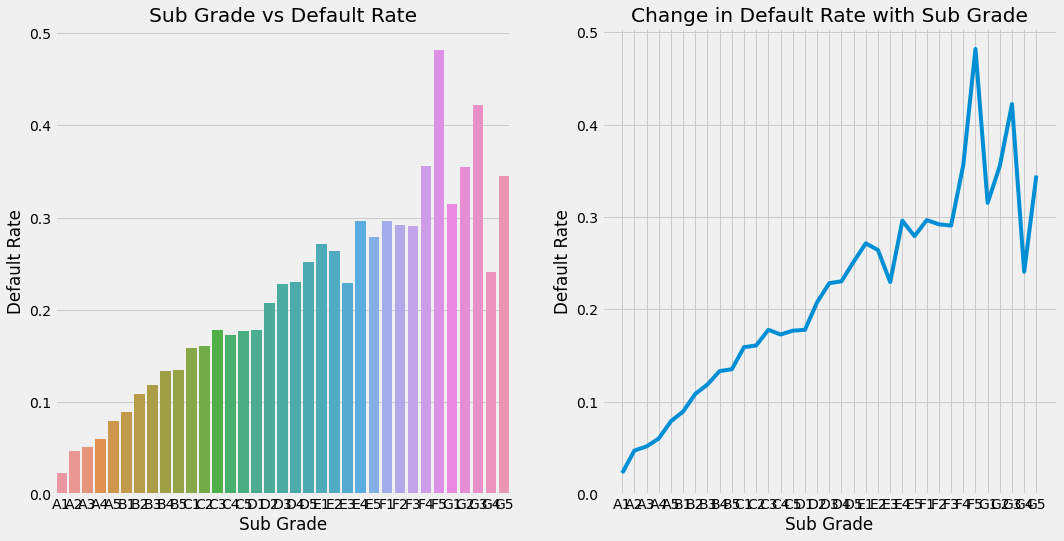

In [60]:
line_plot = loan_clean.groupby('sub_grade')['loan_status'].mean().to_frame().reset_index()

plt.figure(figsize=(16,8))
horizantal_bl(
    p1 =  {'data':loan_clean, 'x':'sub_grade', 'y':'loan_status', 'hue':None, 
           'order':order, 'title':'Sub Grade vs Default Rate', 
           'xl':'Sub Grade', 'yl':'Default Rate', 'legend':None},
    p2 =  {'data':line_plot, 'x':'sub_grade', 'y':'loan_status', 'hue':None, 
           'title':'Change in Default Rate with Sub Grade', 'order':None,
           'xl':'Sub Grade', 'yl':'Default Rate', 'legend':None}
)

In [124]:
# Slope of Defaut rate line plot
df = loan_clean.groupby('sub_grade')['loan_status'].mean().to_frame().reset_index().reset_index()
s,i,r,p,se = stats.linregress(df['index'], df['loan_status'])
s

0.01006541955883669

 Insights

1. As Sub Grade Increases Defaulter rate is increasing and its a critical attribute for analysing risk
2. Higer the Sub Grade more the defaulters

## Issue Date

`issue_d`: The month which the loan was funded

<Figure size 1008x432 with 0 Axes>

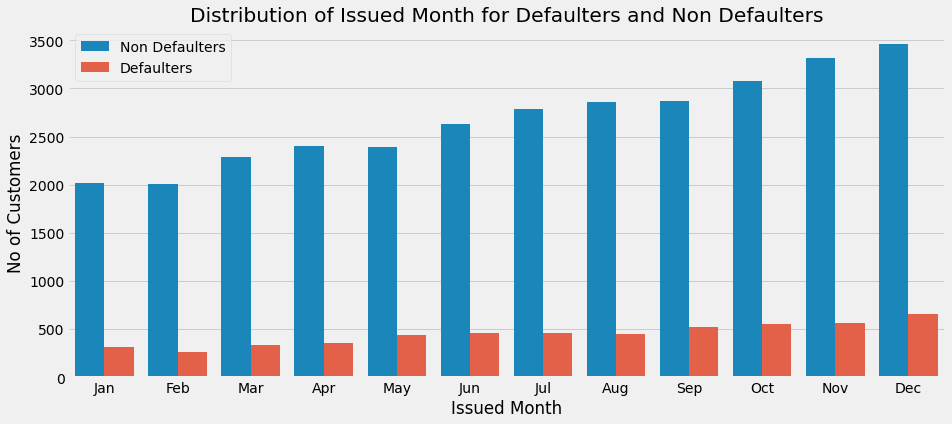

In [61]:
issue_date = pd.DataFrame()
issue_date['month'] = loan_clean['issue_d'].str.split('-').str[0]
issue_date['year'] = loan_clean['issue_d'].str.split('-').str[1]
issue_date['loan_status'] = loan_clean['loan_status']

plt.figure(figsize=(14,6))

# Distribution of Month
order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize=(14,6))
ax =count_plot(issue_date, x='month', hue='loan_status', order = order,
           title='Distribution of Issued Month for Defaulters and Non Defaulters',
           xl = 'Issued Month', yl = 'No of Customers',
           legend = ['Non Defaulters', 'Defaulters'])



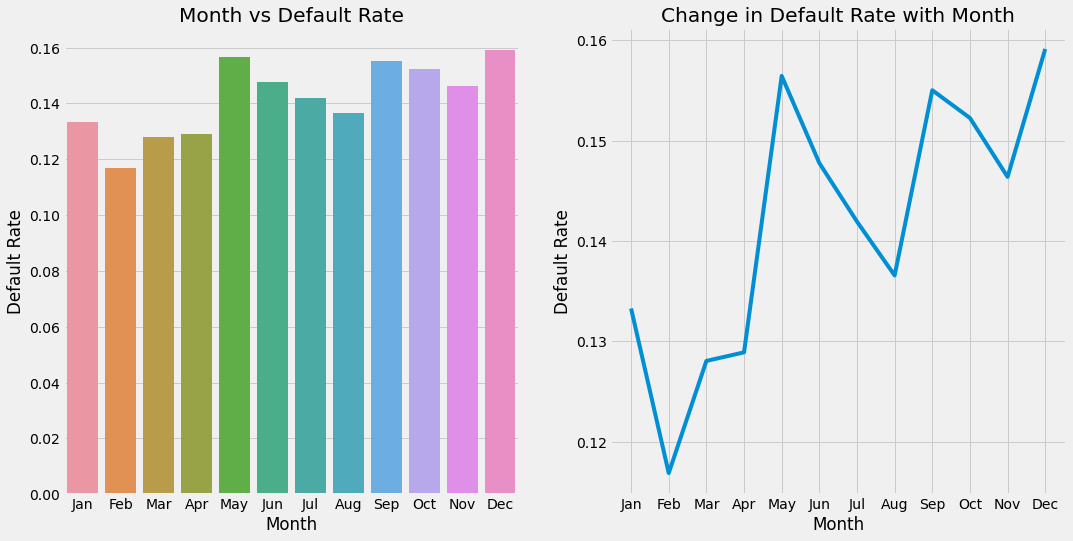

In [62]:
line_plot = issue_date.groupby('month')['loan_status'].mean().to_frame().reset_index()
line_plot['enc'] = line_plot['month']

month_dict = {'enc':{
    'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,
    'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}}

line_plot.replace(month_dict, inplace=True)
line_plot = line_plot.sort_values(by='enc').reset_index()

plt.figure(figsize=(16,8))
horizantal_bl(
    p1 =  {'data':issue_date, 'x':'month', 'y':'loan_status', 'hue':None, 
           'order':order, 'title':'Month vs Default Rate', 
           'xl':'Month', 'yl':'Default Rate', 'legend':None},
    p2 =  {'data':line_plot, 'x':'month', 'y':'loan_status', 'hue':None, 
           'title':'Change in Default Rate with Month', 'order':None,
           'xl':'Month', 'yl':'Default Rate', 'legend':None}
)



>Insights

1. Loans Issued in months of May and December have many defaulters

## Verification Status

`verification_status`: Indicates if income was verified by LC, not verified, or if the income source was verified

<Figure size 1008x432 with 0 Axes>

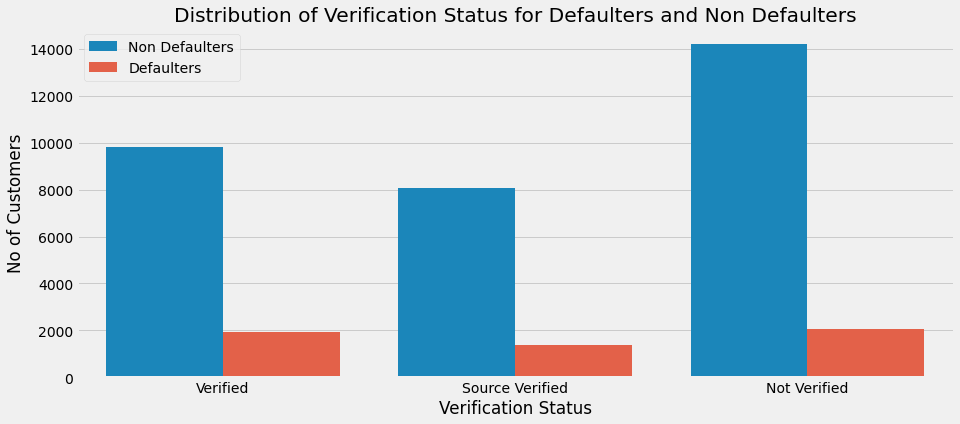

In [63]:
plt.figure(figsize=(14,6))

# Distribution of SubGrade
plt.figure(figsize=(14,6))
ax =count_plot(loan_clean, x='verification_status', hue='loan_status', order = None,
           title='Distribution of Verification Status for Defaulters and Non Defaulters',
           xl = 'Verification Status', yl = 'No of Customers',
           legend = ['Non Defaulters', 'Defaulters'])



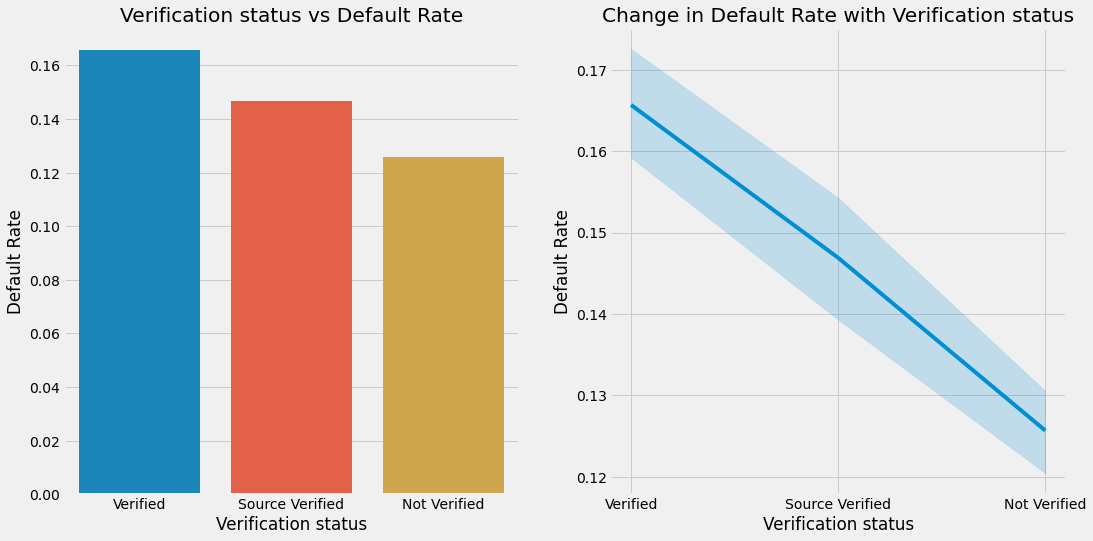

In [64]:
line_plot = loan_clean.groupby('verification_status')['loan_status'].mean().to_frame().reset_index()

plt.figure(figsize=(16,8))
horizantal_bl(
    p1 =  {'data':loan_clean, 'x':'verification_status', 'y':'loan_status', 'hue':None, 
           'order':None, 'title':'Verification status vs Default Rate', 
           'xl':'Verification status', 'yl':'Default Rate', 'legend':None},
    p2 =  {'data':loan_clean, 'x':'verification_status', 'y':'loan_status', 'hue':None, 
           'title':'Change in Default Rate with Verification status', 'order':None,
           'xl':'Verification status', 'yl':'Default Rate', 'legend':None}
)

> Insights

1. More Defaulters belongs to verified category
2. This wont be helpful

## Purpose

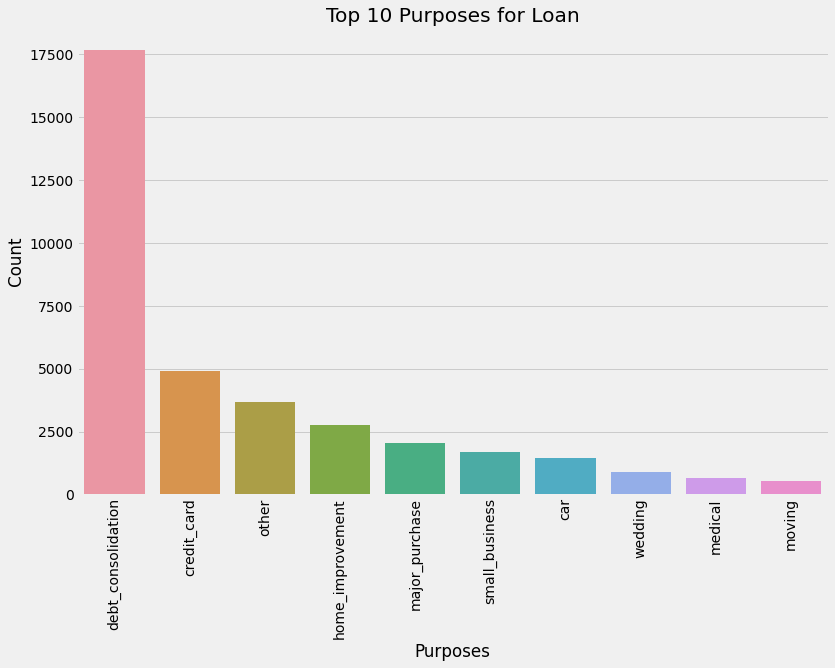

In [65]:
# Indetifying top 10 purposes
plt.figure(figsize=(12,8))
plot = sns.barplot(data=loan_clean['purpose'].value_counts().to_frame().reset_index().head(10), x='index', y= 'purpose')
plot.set_title('Top 10 Purposes for Loan')
plot.set_xlabel('Purposes')
plot.set_ylabel('Count')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot

<Figure size 1008x432 with 0 Axes>

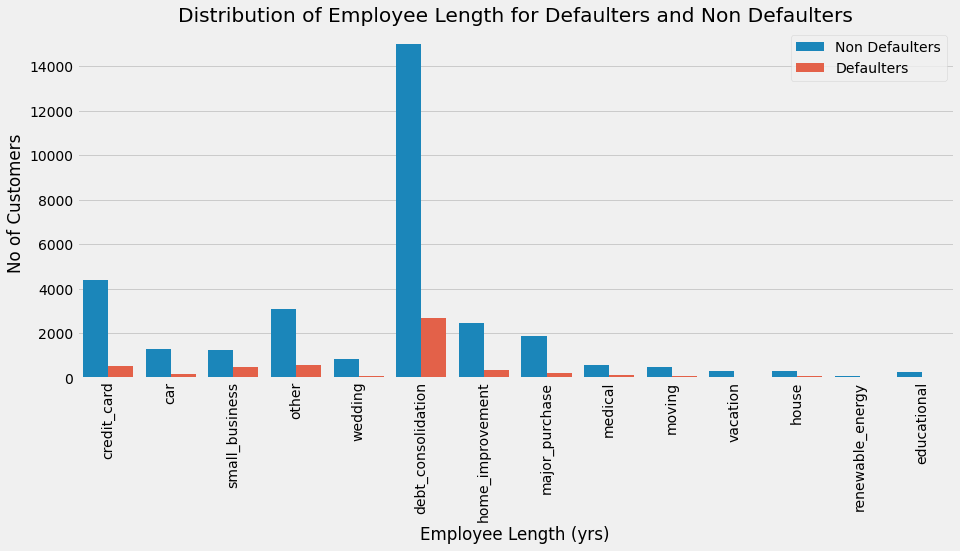

In [66]:
plt.figure(figsize=(14,6))

# Distribution of Purposes
plt.figure(figsize=(14,6))
ax =count_plot(loan_clean, x='purpose', hue='loan_status', order = None,
           title='Distribution of Employee Length for Defaulters and Non Defaulters',
           xl = 'Employee Length (yrs)', yl = 'No of Customers', r=True,
           legend = ['Non Defaulters', 'Defaulters'])


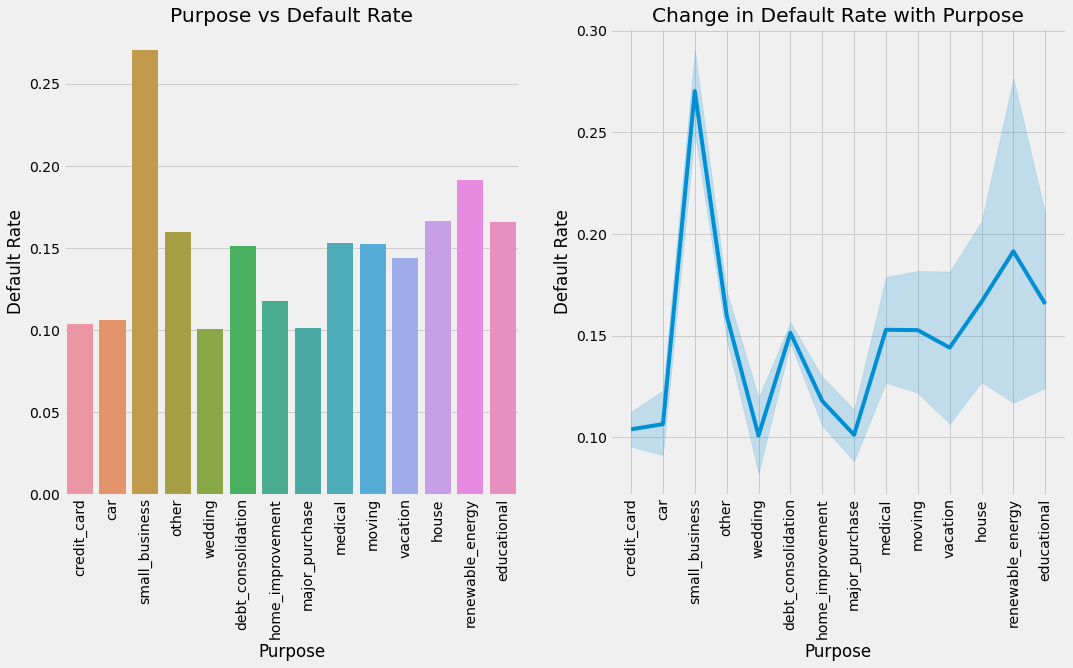

In [67]:
line_plot = loan_clean.groupby('purpose')['loan_status'].mean().to_frame().reset_index()

# order = list(line_plot['purpose'])
plt.figure(figsize=(16,8))
horizantal_bl(
    p1 =  {'data':loan_clean, 'x':'purpose', 'y':'loan_status', 'hue':None, 
           'order':None, 'title':'Purpose vs Default Rate', 'r':True,
           'xl':'Purpose', 'yl':'Default Rate', 'legend':None},
    p2 =  {'data':loan_clean, 'x':'purpose', 'y':'loan_status', 'hue':None, 
           'title':'Change in Default Rate with Purpose', 'order':None, 'r':True,
           'xl':'Purpose', 'yl':'Default Rate', 'legend':None, 'label': order}
)

> Insights

1. Loans given for small business and renewable energy purposes faced many defauters 



## Interest Rate

`int_rate`: Interest Rate on the loan

In [68]:
# String to int onversion by removing % in each row
loan_clean['int_rate'] = loan_clean['int_rate'].str.replace('%','').astype(float)

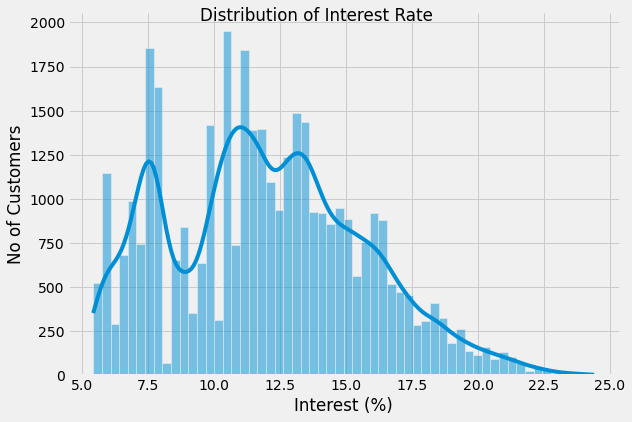

In [69]:
# Interest Rate

loan_amnt = loan_clean[['int_rate', 'loan_status']]

# Distribution of Interest Rate of customers
loan_plot = sns.displot(loan_amnt, x="int_rate", kind='hist', 
                        kde=True, height=6, aspect=1.5)
loan_plot.set_axis_labels("Interest (%)", "No of Customers")
loan_plot.fig.suptitle('Distribution of Interest Rate')
loan_plot

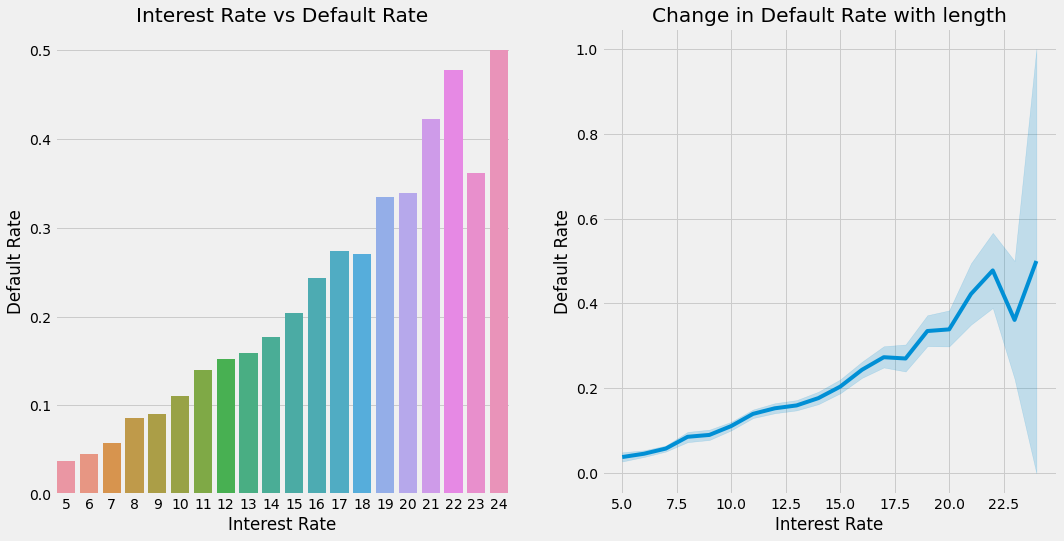

In [70]:
# Binning is directly based on rounded value of interest 
loan_amnt_bin = loan_clean['int_rate'].to_frame()
loan_amnt_bin['int_rate'] = loan_amnt_bin['int_rate'].astype(int)
loan_amnt_bin['loan_status'] = loan_clean['loan_status']

plt.figure(figsize=(16,8))
horizantal_bl(
    p1 =  {'data':loan_amnt_bin, 'x':'int_rate', 'y':'loan_status', 'hue':None, 
           'order':None, 'title':'Interest Rate vs Default Rate', 
           'xl':'Interest Rate', 'yl':'Default Rate', 'legend':None},
    p2 =  {'data':loan_amnt_bin, 'x':'int_rate', 'y':'loan_status', 'hue':None, 
           'order':None, 'title':'Change in Default Rate with length', 
           'xl':'Interest Rate', 'yl':'Default Rate', 'legend':None}
)

In [126]:
# Slope of Defaut rate line plot
df = loan_amnt_bin.groupby('loan_amnt')['loan_status'].mean().to_frame().reset_index().reset_index()
s,i,r,p,se = stats.linregress(df['index'], df['loan_status'])
s

0.01910659056540027

> Insights:

1. As Interest Rate is increasing the defaulter rate is also increasing
2. It is a potential attribute to analyse risk

## DTI

`dti`: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

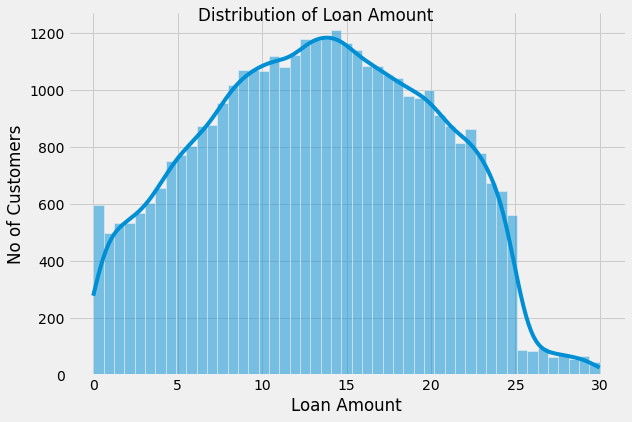

In [71]:
# DTI

loan_amnt = loan_clean[['dti', 'loan_status']]

# Distribution of DTI
loan_plot = sns.displot(loan_amnt, x="dti", kind='hist', 
                        kde=True, height=6, aspect=1.5)
loan_plot.set_axis_labels("Loan Amount", "No of Customers")
loan_plot.fig.suptitle('Distribution of Loan Amount')
loan_plot

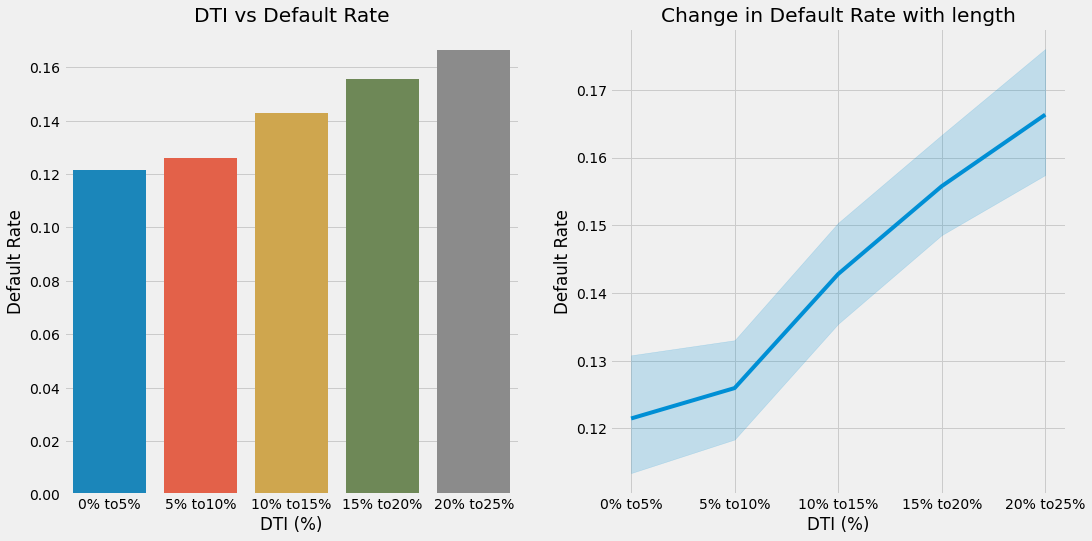

In [72]:
loan_amnt_bin = pd.cut(loan_clean['dti'], [x for x in range(0, 30, 5)], 
                       labels=[str(x)+'% to'+str(x+5)+'%' for x in range (0, 25, 5)]).to_frame()
loan_amnt_bin['loan_status'] = loan_clean['loan_status']

plt.figure(figsize=(16,8))
horizantal_bl(
    p1 =  {'data':loan_amnt_bin, 'x':'dti', 'y':'loan_status', 'hue':None, 
           'order':None, 'title':'DTI vs Default Rate', 
           'xl':'DTI (%)', 'yl':'Default Rate', 'legend':None},
    p2 =  {'data':loan_amnt_bin, 'x':'dti', 'y':'loan_status', 'hue':None, 
           'order':None, 'title':'Change in Default Rate with length', 
           'xl':'DTI (%)', 'yl':'Default Rate', 'legend':None}
)

> Insights:

1. As DTI increases Defaulters rate is also increasing

## Inquiry in Last 6 Months
`inq_last_6mths`: The number of inquiries in past 6 months (excluding auto and mortgage inquiries) open_acc: The number of open credit lines in the borrower's credit file. 

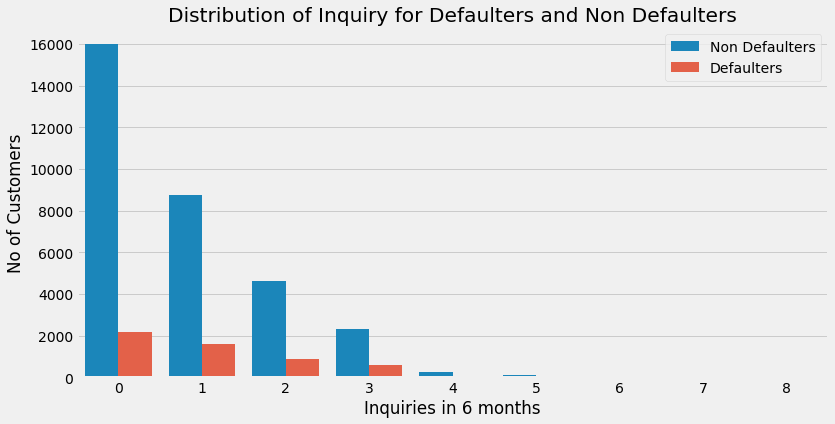

In [73]:
# Distribution of Inquiry

plt.figure(figsize=(12,6))
count_plot(loan_clean, x='inq_last_6mths', hue='loan_status',
           title='Distribution of Inquiry for Defaulters and Non Defaulters',
           xl = 'Inquiries in 6 months', yl = 'No of Customers',
           legend = ['Non Defaulters', 'Defaulters'])

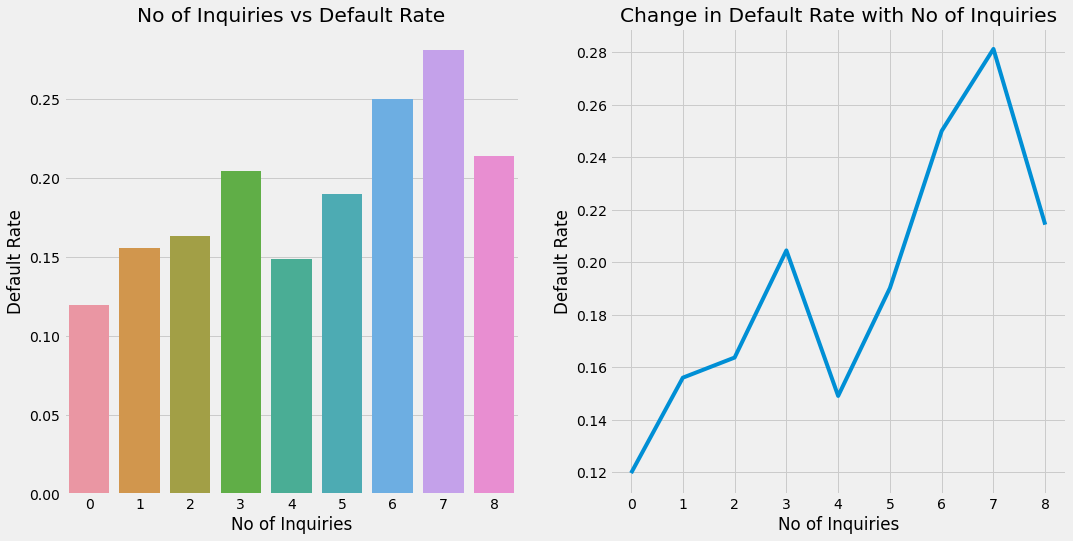

In [74]:
line_plot = loan_clean.groupby('inq_last_6mths')['loan_status'].mean().to_frame().reset_index()

plt.figure(figsize=(16,8))
horizantal_bl(
    p1 =  {'data':loan_clean, 'x':'inq_last_6mths', 'y':'loan_status', 'hue':None, 
           'title':'No of Inquiries vs Default Rate', 'order':None,
           'xl':'No of Inquiries', 'yl':'Default Rate', 'legend':None},
    p2 =  {'data':line_plot, 'x':'inq_last_6mths', 'y':'loan_status', 'hue':None, 
           'title':'Change in Default Rate with No of Inquiries', 'order':None,
           'xl':'No of Inquiries', 'yl':'Default Rate', 'legend':None}
)

> Insights:

1. Inquiries with more than 4 have more defaulters

##Open Account
`open_acc`: The number of open credit lines in the borrower's credit file.


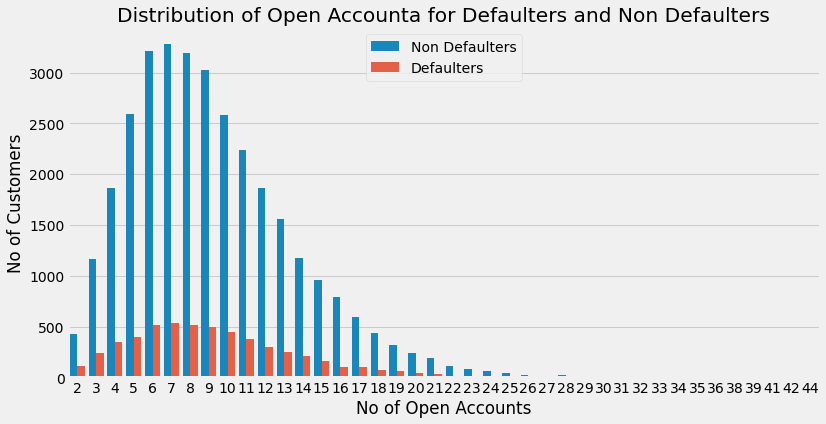

In [75]:
# Open Account Distribution

plt.figure(figsize=(12,6))
count_plot(loan_clean, x='open_acc', hue='loan_status',
           title='Distribution of Open Accounta for Defaulters and Non Defaulters',
           xl = 'No of Open Accounts', yl = 'No of Customers',
           legend = ['Non Defaulters', 'Defaulters'])

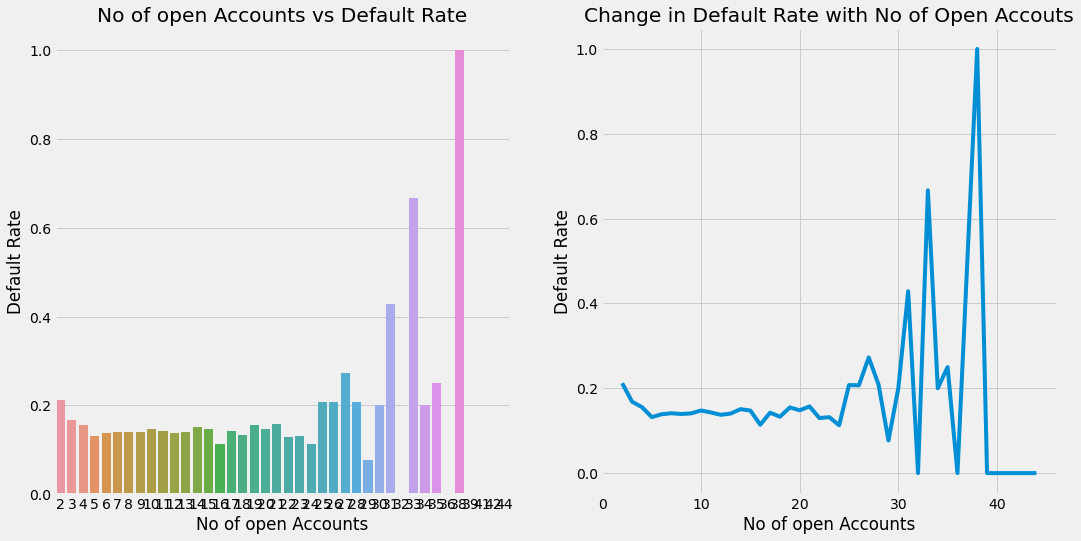

In [76]:
line_plot = loan_clean.groupby('open_acc')['loan_status'].mean().to_frame().reset_index()

plt.figure(figsize=(16,8))
horizantal_bl(
    p1 =  {'data':loan_clean, 'x':'open_acc', 'y':'loan_status', 'hue':None, 
           'title':'No of open Accounts vs Default Rate', 'order':None,
           'xl':'No of open Accounts', 'yl':'Default Rate', 'legend':None},
    p2 =  {'data':line_plot, 'x':'open_acc', 'y':'loan_status', 'hue':None, 
           'title':'Change in Default Rate with No of Open Accouts', 'order':None,
           'xl':'No of open Accounts', 'yl':'Default Rate', 'legend':None}
)

> Insights:

1. Particularly there is no pattern in default rate

## Revolving Utilization
`revol_util`: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

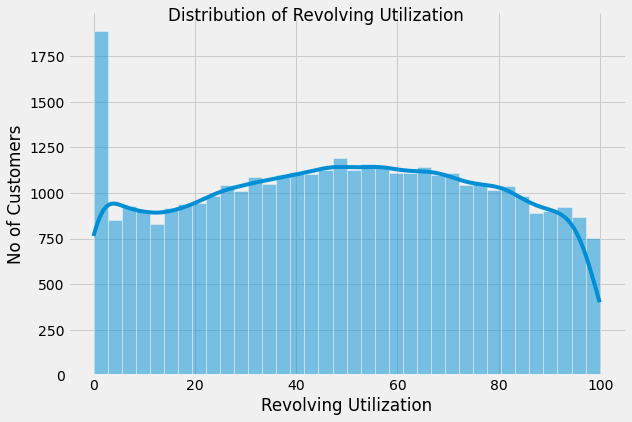

In [81]:
# Revolving Utilization 

loan_amnt = loan_clean[['revol_util', 'loan_status']]

# Distribution of Revolving Utilization of customers
loan_plot = sns.displot(loan_amnt, x="revol_util", kind='hist', 
                        kde=True, height=6, aspect=1.5)
loan_plot.set_axis_labels("Revolving Utilization", "No of Customers")
loan_plot.fig.suptitle('Distribution of Revolving Utilization')
loan_plot

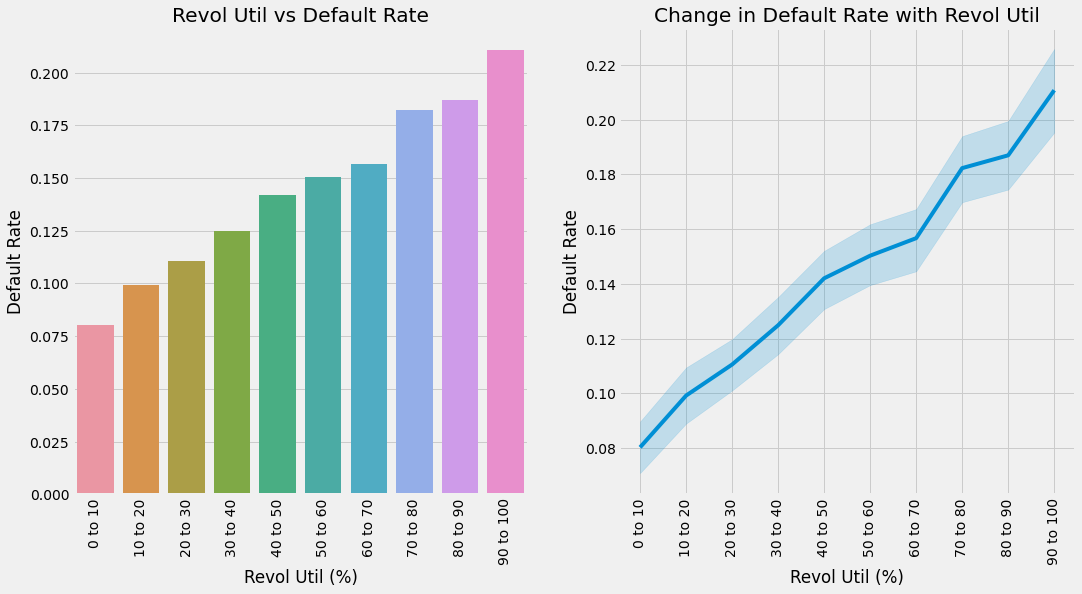

In [80]:
# Binning revol util into 10 categories from (0-100)
loan_clean['revol_util'] = loan_clean['revol_util'].str.replace('%','').astype(float)
loan_amnt_bin = pd.cut(loan_clean['revol_util'].astype(int), [x for x in range(0, 101, 10)], 
                       labels=[str(x)+' to '+str(x+10) for x in range (0, 99, 10)]).to_frame()
loan_amnt_bin['loan_status'] = loan_clean['loan_status']
loan_amnt_bin=loan_amnt_bin[~loan_amnt_bin['revol_util'].isnull()]  

plt.figure(figsize=(16,8))
horizantal_bl(
    p1 =  {'data':loan_amnt_bin, 'x':'revol_util', 'y':'loan_status', 'hue':None, 
           'order':None, 'title':'Revol Util vs Default Rate','r':True, 
           'xl':'Revol Util (%)', 'yl':'Default Rate', 'legend':None},
    p2 =  {'data':loan_amnt_bin, 'x':'revol_util', 'y':'loan_status', 'hue':None, 
           'order':None, 'title':'Change in Default Rate with Revol Util','r':True,
           'xl':'Revol Util (%)', 'yl':'Default Rate', 'legend':None}
)

> Insights:

1. As Revol Util increases Defaulter Rate is also increasing

## Total Accounts
`total_acc`: The total number of credit lines currently in the borrower's credit file

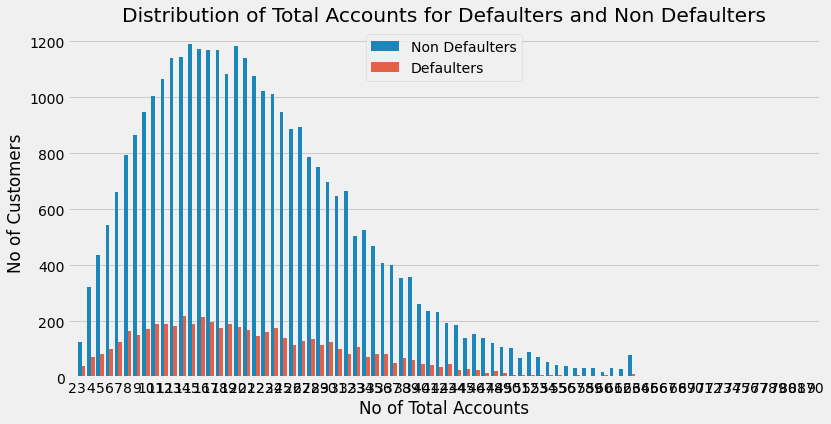

In [82]:
# Total Account Distribution

plt.figure(figsize=(12,6))
count_plot(loan_clean, x='total_acc', hue='loan_status',
           title='Distribution of Total Accounts for Defaulters and Non Defaulters',
           xl = 'No of Total Accounts', yl = 'No of Customers',
           legend = ['Non Defaulters', 'Defaulters'])

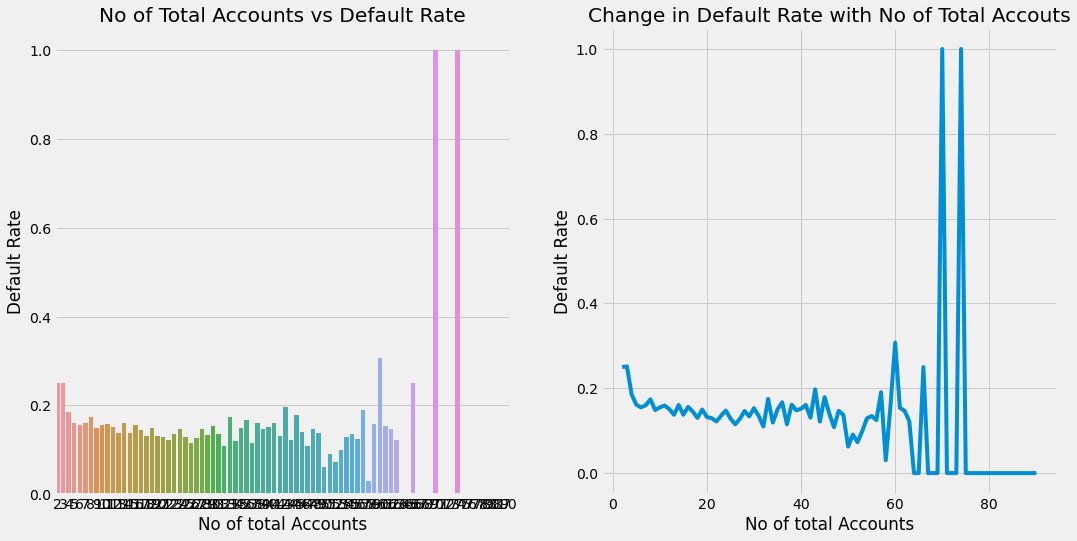

In [83]:
line_plot = loan_clean.groupby('total_acc')['loan_status'].mean().to_frame().reset_index()

plt.figure(figsize=(16,8))
horizantal_bl(
    p1 =  {'data':loan_clean, 'x':'total_acc', 'y':'loan_status', 'hue':None, 
           'title':'No of Total Accounts vs Default Rate', 'order':None,
           'xl':'No of total Accounts', 'yl':'Default Rate', 'legend':None},
    p2 =  {'data':line_plot, 'x':'total_acc', 'y':'loan_status', 'hue':None, 
           'title':'Change in Default Rate with No of Total Accouts', 'order':None,
           'xl':'No of total Accounts', 'yl':'Default Rate', 'legend':None}
)

> Insights:

1. Not a useful parameter

## Delinquency for 2 years
`delinq_2yrs`: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years


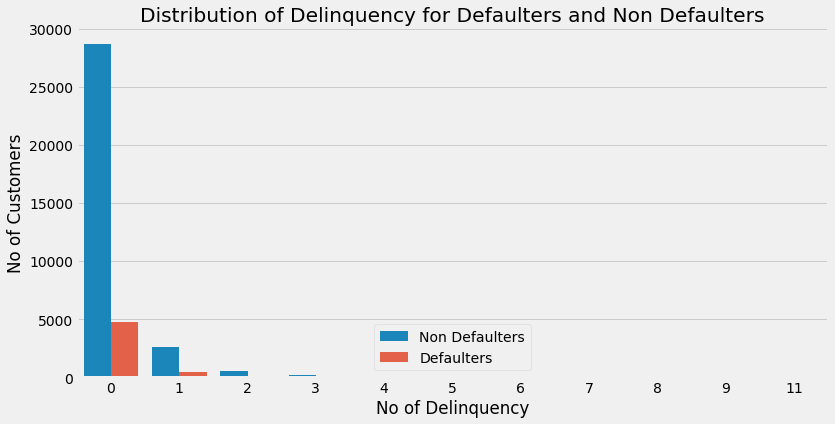

In [84]:
# Total Delinquency

plt.figure(figsize=(12,6))
count_plot(loan_clean, x='delinq_2yrs', hue='loan_status',
           title='Distribution of Delinquency for Defaulters and Non Defaulters',
           xl = 'No of Delinquency', yl = 'No of Customers',
           legend = ['Non Defaulters', 'Defaulters'])

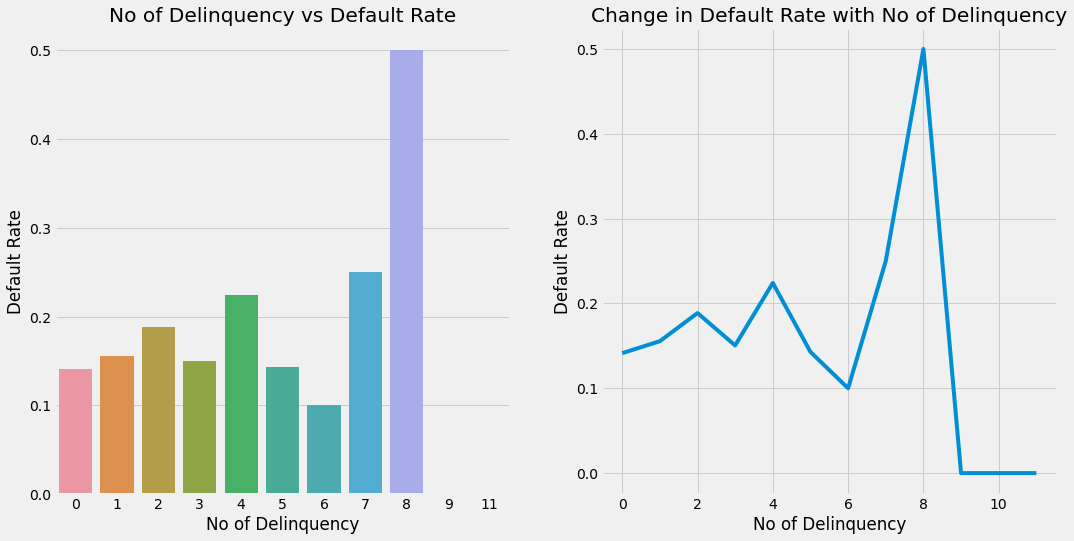

In [85]:
line_plot = loan_clean.groupby('delinq_2yrs')['loan_status'].mean().to_frame().reset_index()

plt.figure(figsize=(16,8))
horizantal_bl(
    p1 =  {'data':loan_clean, 'x':'delinq_2yrs', 'y':'loan_status', 'hue':None, 
           'title':'No of Delinquency vs Default Rate', 'order':None,
           'xl':'No of Delinquency', 'yl':'Default Rate', 'legend':None},
    p2 =  {'data':line_plot, 'x':'delinq_2yrs', 'y':'loan_status', 'hue':None, 
           'title':'Change in Default Rate with No of Delinquency', 'order':None,
           'xl':'No of Delinquency', 'yl':'Default Rate', 'legend':None}
)

## Bivariate Analysis

### Loan Amount vs Annual Income

<Figure size 864x864 with 0 Axes>

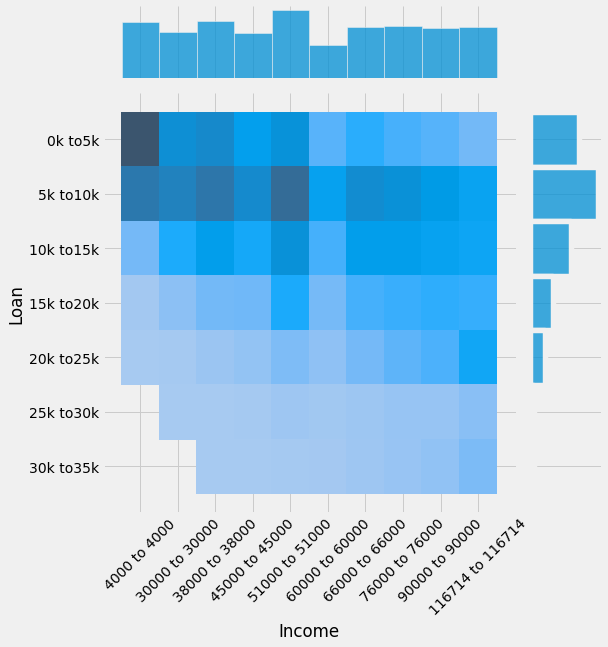

In [88]:
income_loan = pd.DataFrame()
income_loan['Income'] = pd.qcut(loan_clean['annual_inc'], 10, 
                            labels=[str(int(ai.quantile(a/10)))+' to '+str(int(ai.quantile(a/10))) for a in range(0,10)])

income_loan['Loan'] = pd.cut(loan_clean['loan_amnt'], [x for x in range(0, 40000, 5000)], 
                       labels=[str(x)+'k to'+str(x+5)+'k' for x in range (0, 35, 5)])

income_loan['Status'] = loan_clean['loan_status']

plt.figure(figsize=(12,12))
ax=sns.jointplot(data=income_loan, x='Income', y='Loan', kind='hist', height=8)
labels = [str(int(ai.quantile(a/10)))+' to '+str(int(ai.quantile(a/10))) for a in range(0,10)]
ax.ax_joint.set_xticklabels(labels, rotation=45)
ax

> Insights

1. Less than 15k is the loan mostly taken by any Annual Income customer
2. Higher Income Customers don't take loan less 5k 
3. Lesser Income Customers don't take loan more than 20k

### Loan Amount vs Employment Length

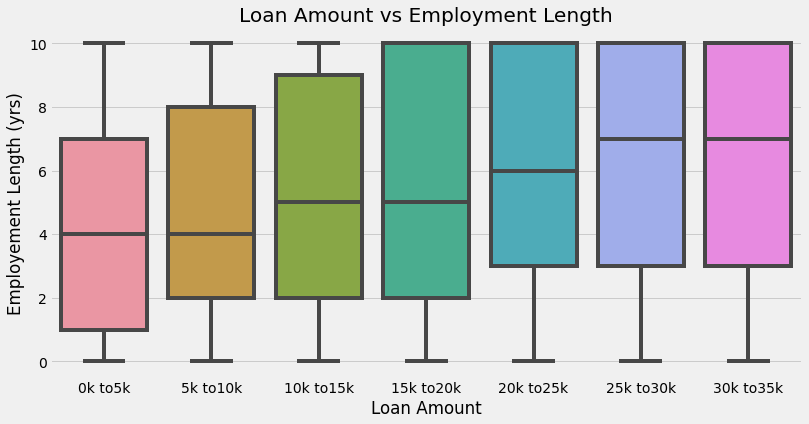

In [89]:
emplen_loan = pd.DataFrame()
emplen_loan['Loan'] = pd.cut(loan_clean['loan_amnt'], [x for x in range(0, 40000, 5000)], 
                       labels=[str(x)+'k to'+str(x+5)+'k' for x in range (0, 35, 5)])

emplen_loan['Len'] = loan_clean['emp_length']

plt.figure(figsize=(12,6))
ax = sns.boxplot(data=emplen_loan, y='Len', x='Loan')
ax.set_title('Loan Amount vs Employment Length')
ax.set_xlabel('Loan Amount')
ax.set_ylabel('Employement Length (yrs)')
ax


> Insights

1. As Employment Length Increases higher loans are been taken 

### Loan Amount vs Interest Rate

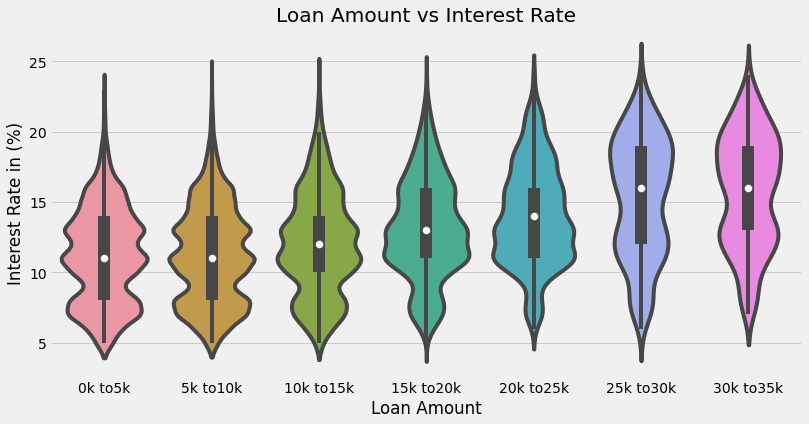

In [90]:
_loan = pd.DataFrame()
_loan['Loan'] = pd.cut(loan_clean['loan_amnt'], [x for x in range(0, 40000, 5000)], 
                       labels=[str(x)+'k to'+str(x+5)+'k' for x in range (0, 35, 5)])

_loan['IR'] = loan_clean['int_rate']
_loan['IR'] = round(_loan['IR'])

plt.figure(figsize=(12,6))
ax = sns.violinplot(data=_loan, y='IR', x='Loan')
ax.set_title('Loan Amount vs Interest Rate')
ax.set_xlabel('Loan Amount')
ax.set_ylabel('Interest Rate in (%)')
ax


> Insights

1. Higher the Loan higher the intersets are been charged
2. For lower income distribution of interest rate is more between (5-10%)
3. For Higher income distribution of interest rate is more between (15-20%)

### Home Ownership vs Annual Income

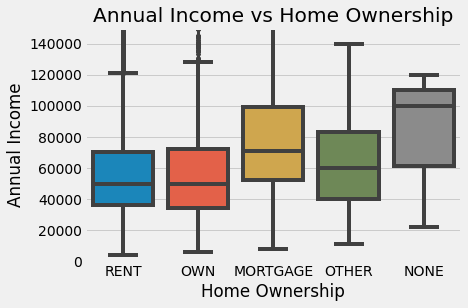

In [91]:
ax = sns.boxplot(data=loan_clean, x='home_ownership',y='annual_inc')
ax.set_ylim(bottom=0, top=150000)
ax.set_title('Annual Income vs Home Ownership')
ax.set_xlabel('Home Ownership')
ax.set_ylabel('Annual Income')
ax

> Insights

1. Higher Income Customers are not mentioning about Home ownership in the application

### Heat Map Correlation

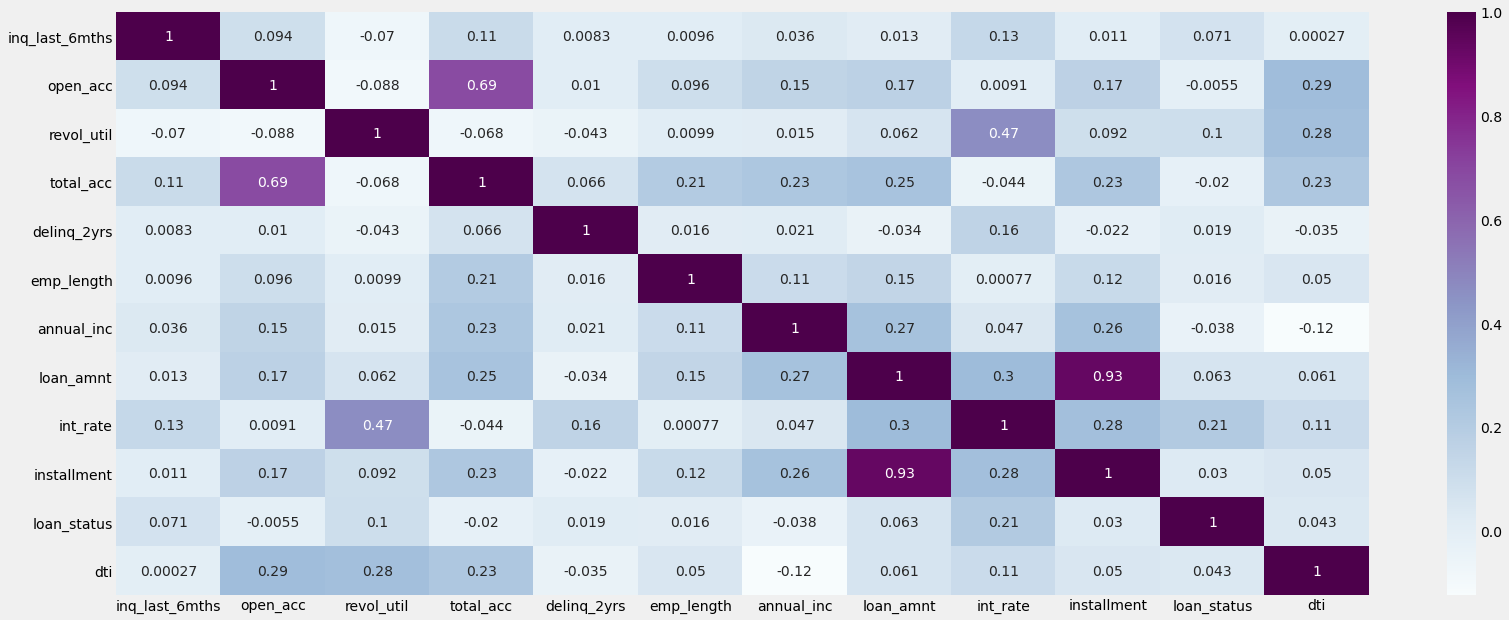

In [93]:
plt.figure(figsize=(25,10))
sns.heatmap(loan_clean.corr(),cmap="BuPu",annot = True)
plt.show()

> Insights

1. There is a correlation between Installment and Loan Amount (Quite obvious as installments are part payments of full loan amount)
2. Correlation between interest rate and Revol Util